# Defining schemes and xalpha values:

In [1]:
scheme = {1: "MS_Bar", 2: "geometric", 3: "Alpha_n, n=2"}
xalpha = {1: "Alpha_MS_Bar", 2: "Alpha_g", 3: "Alpha_2"}

In [2]:
xalpha[2+1]

'Alpha_2'

# Defining SUNc color factors:

In [2]:
import sympy as sp


def CA(Nc):
    return Nc

def CF(Nc):
    return (Nc**2 - 1) / (2 * Nc)

def dAdA(Nc,NA):
    return Nc**2 * (Nc**2 + 36) * NA / 24

def dFdA(Nc,NA):
    return Nc * (Nc**2 + 6) * NA / 48

def dFdF(Nc,NA):
    return (Nc**4 - 6 * Nc**2 + 18) * NA / (96 * Nc**2)

def dAA(Nc):
    return dAdA(Nc,1)

def dFA(Nc):
    return dFdA(Nc,1)

def dFF(Nc):
    return dFdF(Nc,1)

Tf = 1/2


In [4]:
dFdF(Nc,NA)

NameError: name 'Nc' is not defined

In [7]:
Nc = sp.Symbol('Nc')  # Nc is a symbolic variable
NA = sp.Symbol('NA')  # What is NA ??

CA = Nc
CF = (Nc**2 - 1) / (2 * Nc)
Tf = 1 / 2
dAdA = Nc**2 * (Nc**2 + 36) * NA / 24
dFdA = Nc * (Nc**2 + 6) * NA / 48
dFdF = (Nc**4 - 6 * Nc**2 + 18) * NA/ (96 * Nc**2)

In [8]:
print(CF , '\n' , CA.subs(Nc, 3) , '\n' , dFdA.subs(Nc,3).subs(NA,1))

(Nc**2 - 1)/(2*Nc) 
 3 
 15/16


In [9]:
import sympy as sp

# Define the symbolic variable
Nc, NA = sp.symbols('Nc NA')  # NA is introduced for 'N subscript A'

# Create the dictionary SUNc and assign expressions to it
SUNc = {
    'CA': Nc,
    'CF': (Nc**2 - 1) / (2 * Nc),
    'Tf': 1 / 2,
    'dAdA': Nc**2 * (Nc**2 + 36) / (24 * NA),
    'dFdA': Nc * (Nc**2 + 6) / (48 * NA),
    'dFdF': (Nc**4 - 6 * Nc**2 + 18) / (96 * Nc**2 * NA)
}

# Example usage: accessing an element
print("CA:", SUNc['CA'])
print("CF:", SUNc['CF'])
print("Tf:", SUNc['Tf'])
print("dAdA:", SUNc['dAdA'])
print("dFdA:", SUNc['dFdA'])
print("dFdF:", SUNc['dFdF'])

print('\nCF if Nc=3 is : ' , SUNc['CF'].subs(Nc,3))

CA: Nc
CF: (Nc**2 - 1)/(2*Nc)
Tf: 0.5
dAdA: Nc**2*(Nc**2 + 36)/(24*NA)
dFdA: Nc*(Nc**2 + 6)/(48*NA)
dFdF: (Nc**4 - 6*Nc**2 + 18)/(96*NA*Nc**2)

CF if Nc=3 is :  4/3


# Defining beta functions:

In [3]:
import numpy as np
import scipy.special as spl

Pi = np.pi


#The 2 first/scheme-independent

def beta0(Nc,Nf):
    beta0 = (1 / (4 * Pi)) * (11/3 * CA(Nc) - 2/3 * Nf)
    return beta0

def beta1(Nc,Nf):
    beta1 = (1 / (4 * Pi))**2 * (34/3 * CA(Nc)**2 - 10/3 * CA(Nc) * Nf - 2 * CF(Nc) * Nf)
    return beta1

In [4]:
b = beta1(3,5) / (2 * beta0(3,5)**2)
print(b)

0.3289224952741021


In [5]:
# Zeta function using scipy
def Zeta(s):
    return spl.zeta(s, 1)  # '1' is the q parameter, for Riemann Zeta it's set to 1

#Beta scheme-dependent: in the MS bar scheme here ?
def beta2(N,Nf):
    beta2 = (1 / (4 * Pi))**3 * (2857/54 * CA(N)**3 - 1415/27 * CA(N)**2 * Nf / 2 + 
         158/27 * CA(N) * Nf**2 / 4 + 44/9 * CF(N) * Nf**2 / 4 - 
         205/9 * CF(N) * CA(N) * Nf / 2 + CF(N)**2 * Nf)
    return beta2

def beta3(N,Nf):
    beta3 = (1 / (4 * Pi))**4 * (CA(N) * CF(N) * Nf**2 / 4 * (17152/243 + 448/9 * Zeta(3)) + 
         CA(N) * CF(N)**2 * Nf / 2 * (-4204/27 + 352/9 * Zeta(3)) + 
         424/243 * CA(N) * Nf**3 / 8 + 1232/243 * CF(N) * Nf**3 / 8 + 
         CA(N)**2 * CF(N) * Nf / 2 * (7073/243 - 656/9 * Zeta(3)) + 
         CA(N)**2 * Nf**2 / 4 * (7930/81 + 224/9 * Zeta(3)) + 
         CA(N)**3 * Nf / 2 * (-39143/81 + 136/3 * Zeta(3)) + 
         CA(N)**4 * (150653/486 - 44/9 * Zeta(3)) + 
         CF(N)**2 * Nf**2 / 4 * (1352/27 - 704/9 * Zeta(3)) + 
         46 * CF(N)**3 * Nf / 2 + 
         Nf * dFA(N) * (512/9 - 1664/3 * Zeta(3)) + 
         Nf**2 * dFF(N) * (-704/9 + 512/3 * Zeta(3)) + 
         dAA(N) * (-80/9 + 704/3 * Zeta(3)))
    return beta3

In [10]:
# Assuming Beta0, Beta1, Beta2, Beta3 are defined somewhere in your code
Beta0 = sp.Symbol('Beta0')  # Example definition
Beta1 = sp.Symbol('Beta1')  # Example definition
Beta2 = sp.Symbol('Beta2')  # Example definition
Beta3 = sp.Symbol('Beta3')  # Example definition


# Defining the lmL function:

### MS bar fixed order scheme:

In [10]:
def lmL_MSbar(alpha):
    return (1/(2 * Beta0 * alpha) + 
            Beta1/Beta0 * sp.log(Beta0 * alpha) / (2 * Beta0) + 
            alpha * (Beta2/Beta0 - (Beta1/Beta0)**2) / (2 * Beta0) + 
            alpha**2 * (Beta3/Beta0 - (Beta1/Beta0)**3 - 
                        2 * ((Beta1 * Beta2)/(Beta0**2) - (Beta1/Beta0)**3)) / (4 * Beta0))


In [53]:
from sympy import symbols, log, simplify, series

# Define the symbols
Beta0, Beta1, Beta2, Beta3, alpha = symbols('Beta0 Beta1 Beta2 Beta3 alpha')

# Define the lmL function
def lmL_MSbar(alpha):
    term1 = 1 / (2 * Beta0 * alpha)
    term2 = (Beta1 / Beta0) * log(Beta0 * alpha) / (2 * Beta0)
    term3 = alpha * (Beta2 / Beta0 - (Beta1 / Beta0)**2) / (2 * Beta0)
    term4 = alpha**2 * (Beta3 / Beta0 - (Beta1 / Beta0)**3 - 
                        2 * ((Beta1 * Beta2) / (Beta0**2) - (Beta1 / Beta0)**3)) / (4 * Beta0)
    return term1 + term2 + term3 + term4

# Example usage of lmL
series(lmL_MSbar(alpha),alpha,0,3)

alpha**2*(Beta3/(4*Beta0**2) - Beta1*Beta2/(2*Beta0**3) + Beta1**3/(4*Beta0**4)) + alpha*(Beta2/(2*Beta0**2) - Beta1**2/(2*Beta0**3)) + 1/(2*Beta0*alpha) + Beta1*log(Beta0)/(2*Beta0**2) + Beta1*log(alpha)/(2*Beta0**2)

### Geometric scheme :

In [12]:
# Define the lmL function
def lmL_geo(alpha):
    term1 = 1 / (2 * Beta0 * alpha)
    term2 = (Beta1 / Beta0) * log(Beta0 * alpha) / (2 * Beta0)
    return term1 + term2

### Modified geometric scheme :

In [13]:
# Define the lmL function (alpha_n for n=2)
def lmL_mgeo(alpha):
    term1 = 1 / (2 * Beta0 * alpha)
    term2 = (Beta1 / Beta0) * log(Beta0 * alpha) / (2 * Beta0)
    term3 = (Beta1 / Beta0) / (2 * Beta0) * (Beta1 * alpha / Beta0)**2
    return term1 + term2 - term3

### lmL :

In [14]:
def lmL(key, a):
    lmL = {
        1: lmL_MSbar(a),
        2: lmL_geo(a),
        3: lmL_mgeo(a)
        }
    return lmL.get(key, "Invalid key")

# Example usage
print('ln(mu) = ' , lmL(2, alpha))


ln(mu) =  1/(2*Beta0*alpha) + Beta1*log(Beta0*alpha)/(2*Beta0**2)


# Recover Beta function :

In [28]:
def betaFunc(key, a):
    return sp.simplify(1/sp.diff(lmL(key,a),a))

In [39]:
betaFunc(1,sp.symbols('a'))

2*Beta0**4*a**2/(-Beta0**3 + Beta0**2*Beta1*a + Beta0*a**2*(Beta0*Beta2 - Beta1**2) + a**3*(Beta0**2*Beta3 - 2*Beta0*Beta1*Beta2 + Beta1**3))

In [45]:
sp.series(betaFunc(1 , alpha), alpha, 0, 5)

-2*Beta2*alpha**4 - 2*Beta1*alpha**3 - 2*Beta0*alpha**2 + O(alpha**5)

In [44]:
sp.series(betaFunc(1 , alpha), alpha, 0, 6)

-2*Beta2*alpha**4 - 2*Beta1*alpha**3 - 2*Beta0*alpha**2 - 2*Beta0*alpha**5*(-2*Beta1*(-Beta2/Beta0 + Beta1**2/Beta0**2)/Beta0 + Beta3/Beta0 - 2*Beta1*Beta2/Beta0**2 + 2*Beta1**3/Beta0**3) + O(alpha**6)

In [30]:
betaFunc(2,sp.symbols('a'))

2*Beta0**2*a**2/(-Beta0 + Beta1*a)

In [31]:
betaFunc(3,sp.symbols('a'))

-2*Beta0**4*a**2/(Beta0**3 - Beta0**2*Beta1*a + 2*Beta1**3*a**3)

# Defining the inverse function:

In [46]:
a, b, c, d, x, k = sp.symbols('a b c d x k')
inverse_function = sp.solve((a * x + b)/(c * x + d) - k, x)
inverse_function

[(-b + d*k)/(a - c*k)]

### More complexe part:

## Defining betaFunc and related operations:

In [41]:
from sympy import symbols, diff, simplify

alpha = symbols('alpha')
# Assuming lmL is already defined as a function of alpha
# Define betaFunc as the derivative of lmL
def betaFunc(kay , alpha):
    return simplify(1/diff(lmL(kay , alpha), alpha))

# Use of the function
betaFunc_result = betaFunc(2 , alpha)
betaFunc_result

-2*Beta0**2*alpha**2/(Beta0 - Beta1*alpha)

## Series Expansion and Coefficient Extraction:

In [40]:
from sympy import series

# Example of a series expansion of betaFunc around alpha = 0
betaFunc_series = series(betaFunc(2 , alpha), alpha, 0, 5)
# Extracting coefficients
coefficients = [betaFunc_series.coeff(alpha, n) for n in range(5)]

print(betaFunc_series , '\n' , coefficients)

-2*Beta1**2*alpha**4/Beta0 - 2*Beta1*alpha**3 - 2*Beta0*alpha**2 + O(alpha**5) 
 [0, 0, -2*Beta0, -2*Beta1, -2*Beta1**2/Beta0]


### Recover alpha :

In [34]:
def alpha(key , mu):
    
    return sp.solve(lmL(key , log(mu)) - lnMu , log(mu))
    #return sp.solve(lmL(key , log(mu)) - log(mu) , log(mu))
    #return sp.solve(lmL(key , log(mu)) - mu , log(mu))

mu , lnMu = symbols('mu ln(mu)')

print(alpha(2 , mu))
alpha(2 , mu)[0]

[exp((2*Beta0**2*ln(mu) + Beta1*LambertW(-Beta0**2*exp(-2*Beta0**2*ln(mu)/Beta1)/Beta1))/Beta1)/Beta0]


exp((2*Beta0**2*ln(mu) + Beta1*LambertW(-Beta0**2*exp(-2*Beta0**2*ln(mu)/Beta1)/Beta1))/Beta1)/Beta0

In [37]:
sp.simplify(alpha(2 , mu)[0])

exp((2*Beta0**2*ln(mu) + Beta1*LambertW(-Beta0**2*exp(-2*Beta0**2*ln(mu)/Beta1)/Beta1))/Beta1)/Beta0

In [91]:
import sympy as sp

# Define the symbols
x, y = sp.symbols('x y')

# Define the function f(x)
def f_x(x):
    return sp.exp(x) - 3

# Solve the equation f(x) = y for x
inverse_f = sp.solve(f_x(x) - y, x)

# Display the result
print("Inverse function:", inverse_f , '\n' , inverse_f[0])
print(f_x(inverse_f[0]))

Inverse function: [log(y + 3)] 
 log(y + 3)
y


### Other method to recover alpha :

In [83]:
sp.simplify(lmL(1,x))
lmL(1,x)

x**2*(Beta3/Beta0 - 2*Beta1*Beta2/Beta0**2 + Beta1**3/Beta0**3)/(4*Beta0) + x*(Beta2/Beta0 - Beta1**2/Beta0**2)/(2*Beta0) + 1/(2*Beta0*x) + Beta1*log(Beta0*x)/(2*Beta0**2)

In [96]:
Beta0=beta0(3,5)
Beta0

TypeError: 'Symbol' object is not callable

In [72]:
y, x= sp.symbols('y x')

# Solve for the inverse
inverse_solution = sp.solve(sp.simplify(lmL(2,x)) - y, x)
inverse_solution[0]

exp((2*Beta0**2*y + Beta1*LambertW(-Beta0**2*exp(-2*Beta0**2*y/Beta1)/Beta1))/Beta1)/Beta0

In [57]:
def alpha_1(mu_value):
    log_mu = sp.log(mu_value)
    # Evaluate the inverse at log_mu
    # Note: inverse_solution might be a list of solutions
    return [sol.evalf(subs={y: log_mu}) for sol in inverse_solution]

# Example usage
mu_value = sp.Symbol('mu_value')  # Or use a specific numeric value
print("α[1] evaluated at μ =", mu_value, "is:", alpha_1(mu_value))


α[1] evaluated at μ = mu_value is: [exp((2*Beta0**2*log(mu_value) + Beta1*LambertW(-Beta0**2*exp(-2*Beta0**2*log(mu_value)/Beta1)/Beta1))/Beta1)/Beta0]


In [60]:
alpha_1(mu_value)[0]

exp((2*Beta0**2*log(mu_value) + Beta1*LambertW(-Beta0**2*exp(-2*Beta0**2*log(mu_value)/Beta1)/Beta1))/Beta1)/Beta0

### Plot with num val of beta

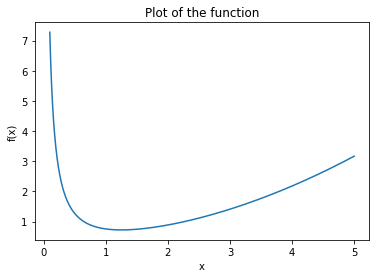

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Define symbols
x, Beta0, Beta1, Beta2, Beta3 = sp.symbols('x Beta0 Beta1 Beta2 Beta3')

# Define the function lmL_1
f = (1/(2 * Beta0 * x)) + (1/(2 * Beta0)) * (Beta1/Beta0) * sp.log(Beta0 * x) + \
    (x/(2 * Beta0)) * (Beta2/Beta0 - (Beta1/Beta0)**2) + \
    (x**2) / (4 * Beta0) * (Beta3/Beta0 - (Beta1/Beta0)**3 - 2 * ((Beta1 * Beta2)/(Beta0**2) - (Beta1/Beta0)**3))


# Lambdify the function for numerical evaluation
f_lambdified_1 = sp.lambdify(x, f.subs({Beta0: beta0(3,5), Beta1: beta1(3,5), Beta2: beta2(3,5), Beta3: beta3(3,5)}), 'numpy')

# Plot the function
x_vals = np.linspace(0.1, 5, 4000)  # Avoid x = 0 due to division by zero
y_vals_1 = f_lambdified_1(x_vals)

plt.plot(x_vals, y_vals_1)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the function')
plt.show()


In [64]:
import sympy as sp

x, Beta0, Beta1, Beta2, Beta3 = sp.symbols('x Beta0 Beta1 Beta2 Beta3')

value1 = 0.3
value2 = 6

expr_piece_1 = (1/(2 * Beta0 * x)) + (1/(2 * Beta0)) * (Beta1/Beta0) * sp.log(Beta0 * x)   # Expression for the first piece

expr_piece_2 = (1/(2 * Beta0 * x)) + (1/(2 * Beta0)) * (Beta1/Beta0) * (sp.log(Beta0) + (x-1)) + \
    (x/(2 * Beta0)) * (Beta2/Beta0 - (Beta1/Beta0)**2) + \
    (x) / (4 * Beta0) * (Beta3/Beta0 - (Beta1/Beta0)**3 - 2 * ((Beta1 * Beta2)/(Beta0**2) - (Beta1/Beta0)**3)) 
    # Expression for the second piece

expr_piece_3 = (x/(2 * Beta0)) * (Beta2/Beta0 - (Beta1/Beta0)**2) + \
    (x**2) / (4 * Beta0) * (Beta3/Beta0 - (Beta1/Beta0)**3 - 2 * ((Beta1 * Beta2)/(Beta0**2) - (Beta1/Beta0)**3))
    # Expression for the third piece

# Define the piecewise function (replace these with actual simpler pieces)
lmL_1_piecewise = sp.Piecewise(
    (expr_piece_1, x < value1),         # Replace expr_piece_1 with the expression for x < a
    (expr_piece_2, sp.And(value1 <= x, x <= value2)),  # Replace expr_piece_2 for a <= x <= b
    (expr_piece_3, x > value2)          # Replace expr_piece_3 for x > b
)


In [65]:
import sympy as sp

# Define the symbols
y = sp.symbols('y')

# Conditions for each piece (these are examples, replace with your actual conditions)
condition_1 = y < value1
condition_2 = sp.And(y >= value1, y <= value2)
condition_3 = y > value2

# Inverses of each piece (replace with your actual inverse expressions)
inverse_piece_1 = sp.solve(expr_piece_1 - y, x)[0]  # Expression for the first piece's inverse
inverse_piece_2 = sp.solve(expr_piece_2 - y, x)[0]  # Expression for the second piece's inverse
inverse_piece_3 = sp.solve(expr_piece_3 - y, x)[0]  # Expression for the third piece's inverse

print(len(sp.solve(expr_piece_1 - y, x)),'\t',len(sp.solve(expr_piece_2 - y, x)),'\t',
      len(sp.solve(expr_piece_3 - y, x)),'\n\n')

print(sp.solve(expr_piece_3 - y, x)[0],'\n',sp.solve(expr_piece_3 - y, x)[1],'\n\n')

print(sp.solve(expr_piece_3 - y, x)[0]==sp.solve(expr_piece_3 - y, x)[1],'\n\n')


# Combine into a single piecewise expression
combined_inverse = sp.Piecewise(
    (inverse_piece_1, condition_1),
    (inverse_piece_2, condition_2),
    (inverse_piece_3, condition_3)
)

# Print the combined piecewise inverse
print("Combined piecewise inverse:", combined_inverse)


1 	 2 	 2 


Beta0*(-Beta0*Beta2 + Beta1**2 - sqrt(4*Beta0**4*Beta3*y - 8*Beta0**3*Beta1*Beta2*y + 4*Beta0**2*Beta1**3*y + Beta0**2*Beta2**2 - 2*Beta0*Beta1**2*Beta2 + Beta1**4))/(Beta0**2*Beta3 - 2*Beta0*Beta1*Beta2 + Beta1**3) 
 Beta0*(-Beta0*Beta2 + Beta1**2 + sqrt(4*Beta0**4*Beta3*y - 8*Beta0**3*Beta1*Beta2*y + 4*Beta0**2*Beta1**3*y + Beta0**2*Beta2**2 - 2*Beta0*Beta1**2*Beta2 + Beta1**4))/(Beta0**2*Beta3 - 2*Beta0*Beta1*Beta2 + Beta1**3) 


False 


Combined piecewise inverse: Piecewise((exp((2*Beta0**2*y + Beta1*LambertW(-Beta0**2*exp(-2*Beta0**2*y/Beta1)/Beta1))/Beta1)/Beta0, y < 0.3), ((Beta0**2*(2*Beta0**2*y - Beta1*log(Beta0) + Beta1) - sqrt(-Beta0**3*(-4*Beta0**5*y**2 + 4*Beta0**3*Beta1*y*log(Beta0) - 4*Beta0**3*Beta1*y + 4*Beta0**2*Beta1 + 4*Beta0**2*Beta2 + 2*Beta0**2*Beta3 - Beta0*Beta1**2*log(Beta0)**2 + 2*Beta0*Beta1**2*log(Beta0) - 5*Beta0*Beta1**2 - 4*Beta0*Beta1*Beta2 + 2*Beta1**3)))/(2*Beta0**2*Beta1 + 2*Beta0**2*Beta2 + Beta0**2*Beta3 - 2*Beta0*Beta1**2 - 2*Beta0*B

In [66]:
# Numerical values for Beta0, Beta1, etc.
beta_values = {
    Beta0: beta0(3,5),  # Example value for Beta0
    Beta1: beta1(3,5),  # Example value for Beta1
    Beta2: beta2(3,5),
    Beta3: beta3(3,5)
    # Add other beta values as needed
}


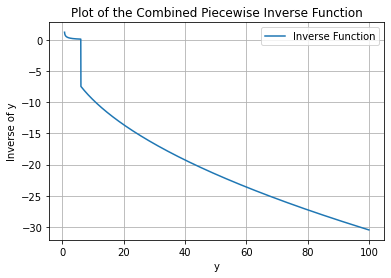

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range for your y values
start = 0.1  # Adjust as needed
end = 100    # Adjust as needed
num_points = 4000

# Prepare the y values for plotting
y_values = np.linspace(start, end, num_points)

# Evaluate the piecewise function at each y value with numerical substitution
inverse_values = []
for value in y_values:
    try:
        # Substitute beta values and evaluate the function
        evaluated_value = combined_inverse.subs(y, value).subs(beta_values).evalf()
        if evaluated_value.is_real:
            inverse_values.append(float(evaluated_value))
        else:
            inverse_values.append(np.nan)  # Handle complex or undefined values
    except Exception as e:
        inverse_values.append(np.nan)  # Append NaN for values where evaluation fails

# Plot the function
plt.plot(y_values, inverse_values, label='Inverse Function')
plt.xlabel('y')
plt.ylabel('Inverse of y')
plt.title('Plot of the Combined Piecewise Inverse Function')
plt.legend()
plt.grid(True)
plt.show()


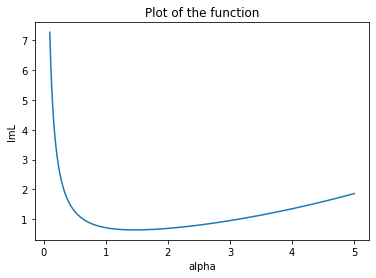

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Define symbols
x, Beta0, Beta1, Beta2, Beta3 = sp.symbols('x Beta0 Beta1 Beta2 Beta3')

# Define the function lmL_3
f = 1 / (2 * Beta0 * x) + \
    (Beta1 / Beta0) * sp.log(Beta0 * x) / (2 * Beta0) + \
    (Beta1 / Beta0) / (2 * Beta0) * (Beta1 * x / Beta0)**2

# Lambdify the function for numerical evaluation
f_lambdified_3 = sp.lambdify(x, f.subs({Beta0: beta0(3,5), Beta1: beta1(3,5), Beta2: beta2(3,5), Beta3: beta3(3,5)}), 'numpy')

# Plot the function
x_vals = np.linspace(0.1, 5, 4000)  # Avoid x = 0 due to division by zero
y_vals_3 = f_lambdified_3(x_vals)

plt.plot(x_vals, y_vals_3)
plt.xlabel('alpha')
plt.ylabel('lmL')
plt.title('Plot of the function')
plt.show()


In [68]:
import sympy as sp

x, Beta0, Beta1, Beta2, Beta3 = sp.symbols('x Beta0 Beta1 Beta2 Beta3')

value1 = 0.4
value2 = 8

expr_piece_1 = 1 / (2 * Beta0 * x) + (Beta1 / Beta0) * sp.log(Beta0 * x) / (2 * Beta0)   # Expression for the first piece
expr_piece_2 = 1 / (2 * Beta0 * x) + \
    (Beta1 / Beta0) * sp.log(Beta0) * (x-1) / (2 * Beta0) + \
    (Beta1 / Beta0) / (2 * Beta0) * (Beta1 * x / Beta0)**2  # Expression for the second piece
expr_piece_3 = (Beta1 / Beta0) / (2 * Beta0) * (Beta1 * x / Beta0)**2  # Expression for the third piece

# Define the piecewise function (replace these with actual simpler pieces)
lmL_3_piecewise = sp.Piecewise(
    (expr_piece_1, x < value1),         # Replace expr_piece_1 with the expression for x < a
    (expr_piece_2, sp.And(value1 <= x, x <= value2)),  # Replace expr_piece_2 for a <= x <= b
    (expr_piece_3, x > value2)          # Replace expr_piece_3 for x > b
)


In [90]:
expr_piece_2 = 1 / (2 * Beta0 * x) + (Beta1 / Beta0) / (2 * Beta0) * (Beta1 * x / Beta0)**2

In [9]:
import sympy as sp

# Define the symbols
y = sp.symbols('y')


# Conditions for each piece (these are examples, replace with your actual conditions)
condition_1 = y < value1
condition_2 = sp.And(y >= value1, y <= value2)
condition_3 = y > value2

# Inverses of each piece (replace with your actual inverse expressions)
inverse_piece_1 = sp.solve(expr_piece_1 - y, x)[0]  # Expression for the first piece's inverse
inverse_piece_2 = sp.solve(expr_piece_2 - y, x)[0]  # Expression for the second piece's inverse
inverse_piece_3 = sp.solve(expr_piece_3 - y, x)[0]  # Expression for the third piece's inverse

print(len(sp.solve(expr_piece_1 - y, x)),'\t',len(sp.solve(expr_piece_2 - y, x)),'\t',
      len(sp.solve(expr_piece_3 - y, x)),'\n\n')

print(sp.solve(expr_piece_1 - y, x)[0],'\n\n')

print(sp.solve(expr_piece_2 - y, x)[0],'\n',sp.solve(expr_piece_2 - y, x)[1],'\n\n')

print(sp.solve(expr_piece_2 - y, x)[0]==sp.solve(expr_piece_3 - y, x)[1],'\n\n')


# Combine into a single piecewise expression
combined_inverse = sp.Piecewise(
    (inverse_piece_1, condition_1),
    (inverse_piece_2, condition_2),
    (inverse_piece_3, condition_3)
)

# Print the combined piecewise inverse
print("Combined piecewise inverse:", combined_inverse)


1 	 3 	 2 


exp((2*Beta0**2*y + Beta1*LambertW(-Beta0**2*exp(-2*Beta0**2*y/Beta1)/Beta1))/Beta1)/Beta0 


-Beta0**2*log(Beta0)/(3*Beta1**2) - (Beta0**4*log(Beta0)**2/Beta1**4 - 3*(-2*Beta0**4*y - Beta0**2*Beta1*log(Beta0))/Beta1**3)/(3*(Beta0**6*log(Beta0)**3/Beta1**6 + 27*Beta0**3/(2*Beta1**3) - 9*Beta0**2*(-2*Beta0**4*y - Beta0**2*Beta1*log(Beta0))*log(Beta0)/(2*Beta1**5) + sqrt(-4*(Beta0**4*log(Beta0)**2/Beta1**4 - 3*(-2*Beta0**4*y - Beta0**2*Beta1*log(Beta0))/Beta1**3)**3 + (2*Beta0**6*log(Beta0)**3/Beta1**6 + 27*Beta0**3/Beta1**3 - 9*Beta0**2*(-2*Beta0**4*y - Beta0**2*Beta1*log(Beta0))*log(Beta0)/Beta1**5)**2)/2)**(1/3)) - (Beta0**6*log(Beta0)**3/Beta1**6 + 27*Beta0**3/(2*Beta1**3) - 9*Beta0**2*(-2*Beta0**4*y - Beta0**2*Beta1*log(Beta0))*log(Beta0)/(2*Beta1**5) + sqrt(-4*(Beta0**4*log(Beta0)**2/Beta1**4 - 3*(-2*Beta0**4*y - Beta0**2*Beta1*log(Beta0))/Beta1**3)**3 + (2*Beta0**6*log(Beta0)**3/Beta1**6 + 27*Beta0**3/Beta1**3 - 9*Beta0**2*(-2*Beta0**4*y - Beta0**2*Beta1*log(Beta0))*l

In [50]:

for i in [0.000001,0.001,0.1,0.7,0.9,1,1.1,1.9,5,8,20,100]:
    print(f.subs(x,i).subs(beta_values),'\t',expr_piece_1.subs(x,i).subs(beta_values),'\t',
          expr_piece_2.subs(x,i).subs(beta_values),'\t',expr_piece_3.subs(x,i).subs(beta_values),'\n')



819541.202865389 	 819541.202865389 	 819545.909632120 	 5.29827083490906e-14 

817.111259057178 	 817.111259004195 	 819.545909632120 	 5.29827083490906e-8 

7.27608236421717 	 7.27555253713368 	 8.19545909632120 	 0.000529827083490906 

0.916888460613034 	 0.890926933521979 	 1.17077987090303 	 0.0259615270910544 

0.756332591488165 	 0.713416597725402 	 0.910606566257911 	 0.0429159937627634 

0.709994093162239 	 0.657011384813149 	 0.819545909632120 	 0.0529827083490906 

0.677965950478890 	 0.613856873376491 	 0.745041736029200 	 0.0641090771023996 

0.671193186600407 	 0.479925609460190 	 0.431339952437958 	 0.191267577140217 

1.85532269998128 	 0.530754991254019 	 0.163909181926424 	 1.32456770872726 

4.01477714889280 	 0.623883814551001 	 0.102443238704015 	 3.39089333434180 

22.0568898448894 	 0.863806505253173 	 0.0409772954816060 	 21.1930833396362 

531.187488493920 	 1.36040500301445 	 0.00819545909632120 	 529.827083490906 



In [14]:

for i in [0.1,0.7,100]:
    print(f.subs(x,i).subs(beta_values),'\t',inverse_piece_1.subs(x,i).subs(beta_values),'\t',
          inverse_piece_2.subs(x,i).subs(beta_values),'\t',inverse_piece_3.subs(x,i).subs(beta_values),'\n')



AttributeError: 'function' object has no attribute 'subs'

In [ ]:
1.0273189913198435
0.916888460613034 

In [72]:

for i in range(10,300,1):
    if expr_piece_3.subs(x,i/100).subs(beta_values)/expr_piece_1.subs(x,i/100).subs(beta_values) > 5/100:
        print(i/100,expr_piece_3.subs(x,i/100).subs(beta_values)/expr_piece_1.subs(x,i/100).subs(beta_values)*100,'%')
        print(f.subs(x,i/100).subs(beta_values),'\t',expr_piece_1.subs(x,i/100).subs(beta_values),'\t',
              expr_piece_2.subs(x,i/100).subs(beta_values),'\t',expr_piece_3.subs(x,i/100).subs(beta_values),'\n')
    else: None



0.85 5.11640989180087 %
0.786461008534292 	 0.748181001752074 	 0.964171658390729 	 0.0382800067822180 

0.86 5.28956840791016 %
0.780002805077415 	 0.740816793982428 	 0.952960360037349 	 0.0391860110949874 

0.87 5.46605957353514 %
0.773768453126686 	 0.733665841177259 	 0.942006792680598 	 0.0401026119494267 

0.88 5.64588675802490 %
0.767750183026732 	 0.726720373681196 	 0.931302170036500 	 0.0410298093455358 

0.89 5.82905252240335 %
0.761940585547869 	 0.719972982264555 	 0.920838100710247 	 0.0419676032833147 

0.9 6.01555863707029 %
0.756332591488165 	 0.713416597725402 	 0.910606566257911 	 0.0429159937627634 

0.91 6.20540609968937 %
0.750919452636871 	 0.707044471852989 	 0.900599900694637 	 0.0438749807838819 

0.92 6.39859515323328 %
0.745694723994758 	 0.700850159648088 	 0.890810771339261 	 0.0448445643466703 

0.93 6.59512530415751 %
0.740652247155906 	 0.694827502704777 	 0.881232160894753 	 0.0458247444511285 

0.94 6.79499534067517 %
0.735786134763708 	 0.6889706136

1.83 36.6539759799490 %
0.661511677803617 	 0.484077885813348 	 0.447839294880940 	 0.177433791990270 

1.84 37.1048249272783 %
0.662814731587124 	 0.483436474200443 	 0.445405385669630 	 0.179378257386681 

1.85 37.5577755228256 %
0.664144978962480 	 0.482811659637717 	 0.442997788990335 	 0.181333319324763 

1.86 38.0128143637953 %
0.665502100283901 	 0.482203122479387 	 0.440616080447376 	 0.183298977804514 

1.87 38.4699281699926 %
0.666885783298586 	 0.481610550472651 	 0.438259844723059 	 0.185275232825935 

1.88 38.9291037842260 %
0.668295722941229 	 0.481033638552203 	 0.435928675336234 	 0.187262084389026 

1.89 39.3903281726363 %
0.669731621135235 	 0.480472088641448 	 0.433622174408529 	 0.189259532493787 

1.9 39.8535884249541 %
0.671193186600407 	 0.479925609460190 	 0.431339952437958 	 0.191267577140217 

1.91 40.3188717546900 %
0.672680134666846 	 0.479393916338529 	 0.429081628079644 	 0.193286218328317 

1.92 40.7861654992591 %
0.674192187094830 	 0.478876731036743 	 0

0.856910081025144 	 0.467799772638587 	 0.302415464808900 	 0.389110308386556 

2.72 83.7759622593196 %
0.859886722799737 	 0.467899453349825 	 0.301303643247103 	 0.391987269449912 

2.73 84.3744522227879 %
0.862877660439009 	 0.468002833384072 	 0.300199966898212 	 0.394874827054937 

2.74 84.9742802982134 %
0.865882837272983 	 0.468109856071351 	 0.299104346581066 	 0.397772981201633 

2.75 85.5754417537144 %
0.868902197573549 	 0.468220465683551 	 0.298016694411680 	 0.400681731889998 

2.76 86.1779319164122 %
0.871935686536120 	 0.468334607416087 	 0.296936923779754 	 0.403601079120032 

2.77 86.7817461716685 %
0.874983250261710 	 0.468452227369973 	 0.295864949325675 	 0.406531022891737 

2.78 87.3868799623304 %
0.878044835739411 	 0.468573272534300 	 0.294800686918029 	 0.409471563205112 

2.79 87.9933287879840 %
0.881120390829272 	 0.468697690769116 	 0.293744053631584 	 0.412422700060156 

2.8 88.6010882042153 %
0.884209864245550 	 0.468825430788679 	 0.292694967725757 	 0.415

In [73]:

for i in range(10,300,1):
    if expr_piece_3.subs(x,i/100).subs(beta_values)/expr_piece_1.subs(x,i/100).subs(beta_values) > 5/100:
        print(i/100,expr_piece_3.subs(x,i/100).subs(beta_values)/expr_piece_1.subs(x,i/100).subs(beta_values)*100,'%')
        print(f.subs(x,i/100).subs(beta_values),'\t',expr_piece_1.subs(x,i/100).subs(beta_values),'\t',
              expr_piece_2.subs(x,i/100).subs(beta_values),'\t',expr_piece_3.subs(x,i/100).subs(beta_values),'\n')
    else: None



0.85 5.11640989180087 %
0.786461008534292 	 0.748181001752074 	 0.964171658390729 	 0.0382800067822180 

0.86 5.28956840791016 %
0.780002805077415 	 0.740816793982428 	 0.952960360037349 	 0.0391860110949874 

0.87 5.46605957353514 %
0.773768453126686 	 0.733665841177259 	 0.942006792680598 	 0.0401026119494267 

0.88 5.64588675802490 %
0.767750183026732 	 0.726720373681196 	 0.931302170036500 	 0.0410298093455358 

0.89 5.82905252240335 %
0.761940585547869 	 0.719972982264555 	 0.920838100710247 	 0.0419676032833147 

0.9 6.01555863707029 %
0.756332591488165 	 0.713416597725402 	 0.910606566257911 	 0.0429159937627634 

0.91 6.20540609968937 %
0.750919452636871 	 0.707044471852989 	 0.900599900694637 	 0.0438749807838819 

0.92 6.39859515323328 %
0.745694723994758 	 0.700850159648088 	 0.890810771339261 	 0.0448445643466703 

0.93 6.59512530415751 %
0.740652247155906 	 0.694827502704777 	 0.881232160894753 	 0.0458247444511285 

0.94 6.79499534067517 %
0.735786134763708 	 0.6889706136

1.73 32.2641122246762 %
0.650052843724109 	 0.491480895906116 	 0.473725959324925 	 0.158571947817993 

1.74 32.6931810141816 %
0.651064592856653 	 0.490654145058946 	 0.471003396340299 	 0.160410447797707 

1.75 33.1244920756215 %
0.652107189223832 	 0.489847644904742 	 0.468311948361211 	 0.162259544319090 

1.76 33.5580308207240 %
0.653180226267075 	 0.489060988884932 	 0.465651085018250 	 0.164119237382143 

1.77 33.9937827750592 %
0.654283307309103 	 0.488293780322237 	 0.463020287927751 	 0.165989526986866 

1.78 34.4317335793523 %
0.655416045264676 	 0.487545632131417 	 0.460419050355124 	 0.167870413133259 

1.79 34.8718689906902 %
0.656578062361299 	 0.486816166539978 	 0.457846876889452 	 0.169761895821321 

1.8 35.3141748836252 %
0.657768989869486 	 0.486105014818432 	 0.455303283128956 	 0.171663975051054 

1.81 35.7586372511800 %
0.658988467842210 	 0.485411817019754 	 0.452787795376862 	 0.173576650822456 

1.82 36.2052422057558 %
0.660236144863184 	 0.484736221727657 	 0

2.63 78.4505785975405 %
0.833618724448100 	 0.467142629068276 	 0.311614414308791 	 0.366476095379825 

2.64 79.0368024958818 %
0.836478839760858 	 0.467210555651037 	 0.310434056678833 	 0.369268284109822 

2.65 79.6244098778783 %
0.839353740552481 	 0.467282671170992 	 0.309262607408347 	 0.372071069381489 

2.66 80.2133954450359 %
0.842243361904078 	 0.467358910709253 	 0.308099966027113 	 0.374884451194825 

2.67 80.8037539650733 %
0.845147640001729 	 0.467439210451897 	 0.306946033570082 	 0.377708429549832 

2.68 81.3954802710895 %
0.848066512114381 	 0.467523507667872 	 0.305800712549298 	 0.380543004446508 

2.69 81.9885692607403 %
0.850999916572270 	 0.467611740687415 	 0.304663906926439 	 0.383388175884854 

2.7 82.5830158954221 %
0.853947792745839 	 0.467703848880968 	 0.303535522085970 	 0.386243943864871 

2.71 83.1788151994625 %
0.856910081025144 	 0.467799772638587 	 0.302415464808900 	 0.389110308386556 

2.72 83.7759622593196 %
0.859886722799737 	 0.467899453349825 	 0

In [92]:

for i in range(1,300,1):
    if 115/100 > f.subs(x,i/100).subs(beta_values)/expr_piece_2.subs(x,i/100).subs(beta_values) > 85/100:
        print(i/100,f.subs(x,i/100).subs(beta_values)/expr_piece_2.subs(x,i/100).subs(beta_values)*100,'%')
        print(f.subs(x,i/100).subs(beta_values),'\t',expr_piece_1.subs(x,i/100).subs(beta_values),'\t',
              expr_piece_2.subs(x,i/100).subs(beta_values),'\t',expr_piece_3.subs(x,i/100).subs(beta_values),'\n')
    else: None



0.01 97.9534050924922 %
80.2773176679268 	 80.2773123696559 	 81.9545962614828 	 5.29827083490906e-6 

0.02 96.4631971760384 %
39.5280297813553 	 39.5280085882719 	 40.9773166746893 	 2.11930833396362e-5 

0.03 95.1829983440740 %
26.0023243739463 	 26.0022766895088 	 27.3182446721748 	 4.76844375141815e-5 

0.04 94.0391862096444 %
19.2674373200243 	 19.2673525476909 	 20.4887325131364 	 8.47723333585450e-5 

0.05 92.9967987778099 %
15.2431523900038 	 15.2430199332329 	 16.3910506494133 	 0.000132456770872727 

0.06 92.0352473722554 %
12.5713606336121 	 12.5711698958621 	 13.6592892316187 	 0.000190737750056726 

0.07 91.1409309467075 %
10.6708333525516 	 10.6705737372807 	 11.7080583243012 	 0.000259615270910544 

0.08 90.3041857326674 %
9.25135946684482 	 9.25102037751138 	 10.2446629597349 	 0.000339089333434180 

0.09 89.5177889901084 %
8.15193281961568 	 8.15150365967805 	 9.10649482251674 	 0.000429159937627634 

0.1 88.7761371106711 %
7.27608236421717 	 7.27555253713368 	 8.19598

0.658988467842210 	 0.485411817019754 	 0.626364446199318 	 0.173576650822456 

1.82 105.502761000683 %
0.660236144863184 	 0.484736221727657 	 0.625799873482846 	 0.175499923135528 

1.83 105.795642207110 %
0.661511677803617 	 0.484077885813348 	 0.625273086871209 	 0.177433791990270 

1.84 106.087081336632 %
0.662814731587124 	 0.483436474200443 	 0.624783643056312 	 0.179378257386681 

1.85 106.377044186510 %
0.664144978962480 	 0.482811659637717 	 0.624331108315098 	 0.181333319324763 

1.86 106.665497407376 %
0.665502100283901 	 0.482203122479387 	 0.623915058251890 	 0.183298977804514 

1.87 106.952408502822 %
0.666885783298586 	 0.481610550472651 	 0.623535077548994 	 0.185275232825935 

1.88 107.237745828557 %
0.668295722941229 	 0.481033638552203 	 0.623190759725260 	 0.187262084389026 

1.89 107.521478591162 %
0.669731621135235 	 0.480472088641448 	 0.622881706902316 	 0.189259532493787 

1.9 107.803576846420 %
0.671193186600407 	 0.479925609460190 	 0.622607529578175 	 0.191

### Plotting of the inverse:

In [8]:
# Numerical values for Beta0, Beta1, etc.
beta_values = {
    Beta0: beta0(3,5),  # Example value for Beta0
    Beta1: beta1(3,5),  # Example value for Beta1
    Beta2: beta2(3,5),
    Beta3: beta3(3,5)
    # Add other beta values as needed
}


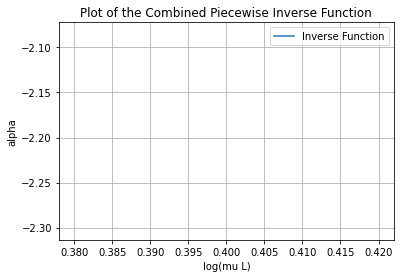

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range for your y values
start = 0.01  # Adjust as needed
end = 0.4    # Adjust as needed
num_points = 4000

# Prepare the y values for plotting
y_values = np.linspace(start, end, num_points)

# Evaluate the piecewise function at each y value with numerical substitution
inverse_values = []
for value in y_values:
    try:
        # Substitute beta values and evaluate the function
        evaluated_value = combined_inverse.subs(y, value).subs(beta_values).evalf()
        if evaluated_value.is_real:
            inverse_values.append(float(evaluated_value))
        else:
            inverse_values.append(np.nan)  # Handle complex or undefined values
    except Exception as e:
        inverse_values.append(np.nan)  # Append NaN for values where evaluation fails

# Plot the function
plt.plot(y_values, inverse_values, label='Inverse Function')
plt.xlabel('log(mu L)')
plt.ylabel('alpha')
plt.title('Plot of the Combined Piecewise Inverse Function')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
print(beta0(3,5),'\n',beta1(3,5),'\n',beta2(3,5),'\n',beta3(3,5))

0.6100939485189322 
 0.24485952713564968 
 0.09116471061282587 
 0.19353607511601503


/tmp/ipykernel_4641/2765555034.py:7: RuntimeWarning: invalid value encountered in log
  return (1/(2 * Beta0 * x)) + (1/(2 * Beta0)) * (Beta1/Beta0) * np.log(Beta0 * x) + \


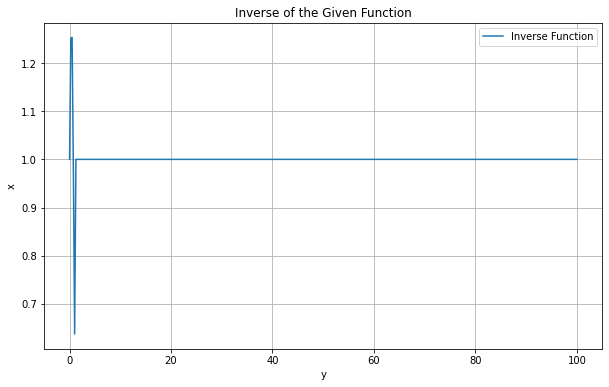

In [14]:
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

# Function definition
def f(x, Beta0, Beta1, Beta2, Beta3):
    return (1/(2 * Beta0 * x)) + (1/(2 * Beta0)) * (Beta1/Beta0) * np.log(Beta0 * x) + \
           (x/(2 * Beta0)) * (Beta2/Beta0 - (Beta1/Beta0)**2) + \
           (x**2) / (4 * Beta0) * (Beta3/Beta0 - (Beta1/Beta0)**3 - \
                                   2 * ((Beta1 * Beta2)/(Beta0**2) - (Beta1/Beta0)**3))

# Beta values
Beta0 = 0.6100939485189322
Beta1 = 0.24485952713564968
Beta2 = 0.09116471061282587
Beta3 = 0.19353607511601503

# Inverse function approximation
def inverse_f(y, Beta0, Beta1, Beta2, Beta3):
    # Given y, find x such that f(x) = y
    func = lambda x: f(x, Beta0, Beta1, Beta2, Beta3) - y
    x_initial_guess = 1.0
    x_solution, = fsolve(func, x_initial_guess)
    return x_solution

# Range of y values
y_values = np.linspace(0.01, 100, 400)
x_values = [inverse_f(y, Beta0, Beta1, Beta2, Beta3) for y in y_values]

# Plotting the inverse function
plt.figure(figsize=(10, 6))
plt.plot(y_values, x_values, label="Inverse Function")
plt.xlabel("y")
plt.ylabel("x")
plt.title("Inverse of the Given Function")
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipykernel_4641/2765555034.py:7: RuntimeWarning: invalid value encountered in log
  return (1/(2 * Beta0 * x)) + (1/(2 * Beta0)) * (Beta1/Beta0) * np.log(Beta0 * x) + \


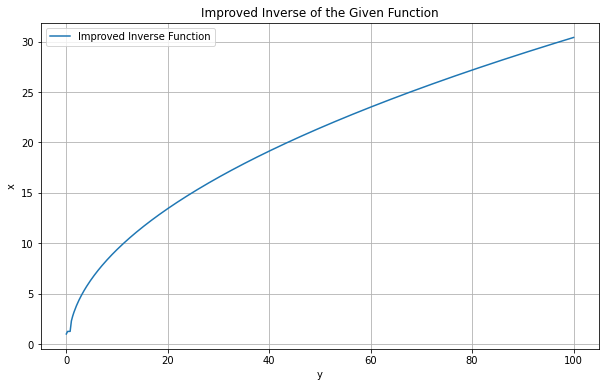

In [15]:
# Improved method for the inverse function using adaptive guessing
def improved_inverse_f(y_values, Beta0, Beta1, Beta2, Beta3):
    x_values = []
    x_initial_guess = 1.0  # Starting guess for the first y value

    for y in y_values:
        func = lambda x: f(x, Beta0, Beta1, Beta2, Beta3) - y
        x_solution, = fsolve(func, x_initial_guess)

        # Update the guess for the next iteration
        x_initial_guess = x_solution

        x_values.append(x_solution)

    return x_values

# Calculating the inverse function values with the improved method
improved_x_values = improved_inverse_f(y_values, Beta0, Beta1, Beta2, Beta3)

# Plotting the improved inverse function
plt.figure(figsize=(10, 6))
plt.plot(y_values, improved_x_values, label="Improved Inverse Function")
plt.xlabel("y")
plt.ylabel("x")
plt.title("Improved Inverse of the Given Function")
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipykernel_4641/927585411.py:8: RuntimeWarning: invalid value encountered in log
  (Beta1 / Beta0) * np.log(Beta0 * x) / (2 * Beta0) + \


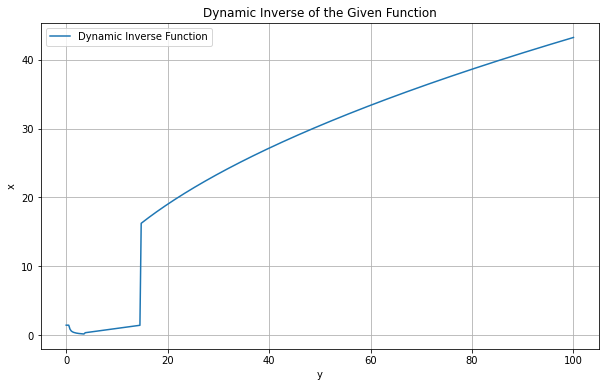

In [19]:
# Dynamic approach for choosing initial guesses based on the value of y
def dynamic_inverse_f(y_values, Beta0, Beta1, Beta2, Beta3):
    x_values = []

    for y in y_values:
        # Adjusting the initial guess based on the magnitude of y
        x_initial_guess = y / 10  # Example of a dynamic initial guess

        func = lambda x: f(x, Beta0, Beta1, Beta2, Beta3) - y
        x_solution, = fsolve(func, x_initial_guess)

        x_values.append(x_solution)

    return x_values

# Calculating the inverse function values with the dynamic approach
dynamic_x_values = dynamic_inverse_f(y_values, Beta0, Beta1, Beta2, Beta3)

# Plotting the dynamic inverse function
plt.figure(figsize=(10, 6))
plt.plot(y_values, dynamic_x_values, label="Dynamic Inverse Function")
plt.xlabel("y")
plt.ylabel("x")
plt.title("Dynamic Inverse of the Given Function")
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipykernel_4641/927585411.py:8: RuntimeWarning: invalid value encountered in log
  (Beta1 / Beta0) * np.log(Beta0 * x) / (2 * Beta0) + \
/home/gofer/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


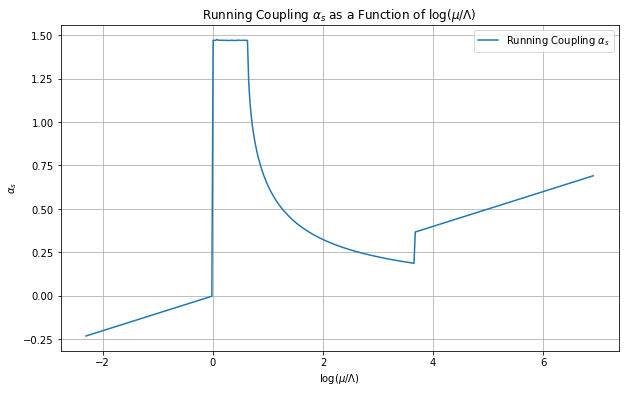

In [20]:
# Recalculating the inverse function with QCD context in mind
# We'll use a logarithmic scale for y values, representing log(mu/Lambda)

# Adjusting the range of y values to reflect physically meaningful values in QCD context
# Assuming Lambda is a fixed scale, we vary mu
Lambda = 1  # Arbitrary choice for Lambda, can be adjusted as needed
mu_values = np.geomspace(0.1, 1000, 400)  # Geometric progression for mu
log_mu_over_Lambda = np.log(mu_values / Lambda)

# Recalculating the inverse function (running coupling alpha_s)
alpha_s_values = dynamic_inverse_f(log_mu_over_Lambda, Beta0, Beta1, Beta2, Beta3)

# Plotting the running coupling as a function of log(mu/Lambda)
plt.figure(figsize=(10, 6))
plt.plot(log_mu_over_Lambda, alpha_s_values, label="Running Coupling $\\alpha_s$")
plt.xlabel("log($\\mu/\\Lambda$)")
plt.ylabel("$\\alpha_s$")
plt.title("Running Coupling $\\alpha_s$ as a Function of log($\\mu/\\Lambda$)")
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipykernel_4641/1695794164.py:3: RuntimeWarning: invalid value encountered in log
  return (1/(2 * Beta0 * x)) + (1/(2 * Beta0)) * (Beta1/Beta0) * np.log(Beta0 * x) + \


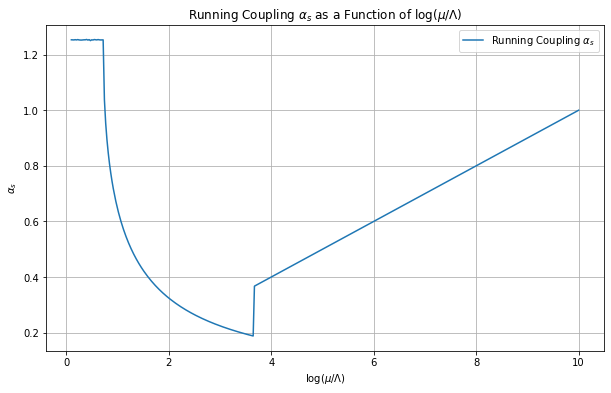

In [38]:
# Redefining the function f with the provided Beta values
def f(x, Beta0, Beta1, Beta2, Beta3):
    return (1/(2 * Beta0 * x)) + (1/(2 * Beta0)) * (Beta1/Beta0) * np.log(Beta0 * x) + \
           (x/(2 * Beta0)) * (Beta2/Beta0 - (Beta1/Beta0)**2) + \
           (x**2) / (4 * Beta0) * (Beta3/Beta0 - (Beta1/Beta0)**3 - 2 * ((Beta1 * Beta2)/(Beta0**2) - (Beta1/Beta0)**3))

# Redoing the inverse calculation
# Selecting a range of log(mu/Lambda) values
log_mu_over_Lambda = np.linspace(0.1, 10, 400)  # Adjust the range as needed

# Calculating the inverse function (alpha_s)
alpha_s_values_1 = dynamic_inverse_f(log_mu_over_Lambda, Beta0, Beta1, Beta2, Beta3)

# Plotting the running coupling as a function of log(mu/Lambda)
plt.figure(figsize=(10, 6))
plt.plot(log_mu_over_Lambda, alpha_s_values_1, label="Running Coupling $\\alpha_s$")
plt.xlabel("log($\\mu/\\Lambda$)")
plt.ylabel("$\\alpha_s$")
plt.title("Running Coupling $\\alpha_s$ as a Function of log($\\mu/\\Lambda$)")
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipykernel_4641/116587233.py:3: RuntimeWarning: invalid value encountered in log
  return (1/(2 * Beta0 * x)) + (1/(2 * Beta0)) * (Beta1/Beta0) * np.log(Beta0 * x) + \


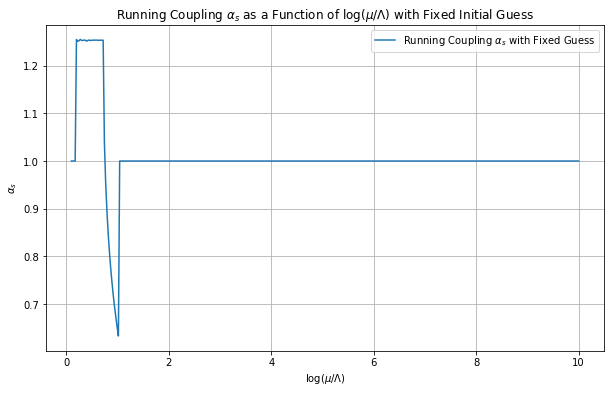

In [37]:
# Using a fixed initial guess for the inverse function calculation
def fixed_guess_inverse_f(y_values, Beta0, Beta1, Beta2, Beta3, initial_guess):
    x_values = []

    for y in y_values:
        func = lambda x: f(x, Beta0, Beta1, Beta2, Beta3) - y
        x_solution, = fsolve(func, initial_guess)
        x_values.append(x_solution)

    return x_values

# Fixed initial guess
initial_guess = 1.0

# Calculating the inverse function (alpha_s) with a fixed initial guess
alpha_s_values_fixed_guess = fixed_guess_inverse_f(log_mu_over_Lambda, Beta0, Beta1, Beta2, Beta3, initial_guess)

# Plotting the running coupling as a function of log(mu/Lambda)
plt.figure(figsize=(10, 6))
plt.plot(log_mu_over_Lambda, alpha_s_values_fixed_guess, label="Running Coupling $\\alpha_s$ with Fixed Guess")
plt.xlabel("log($\\mu/\\Lambda$)")
plt.ylabel("$\\alpha_s$")
plt.title("Running Coupling $\\alpha_s$ as a Function of log($\\mu/\\Lambda$) with Fixed Initial Guess")
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# Beta values
Beta0 = 0.6100939485189322
Beta1 = 0.24485952713564968
Beta2 = 0.09116471061282587
Beta3 = 0.19353607511601503

In [7]:
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

# Dynamic approach for choosing initial guesses based on the value of y
def dynamic_inverse_f(y_values, Beta0, Beta1, Beta2, Beta3):
    x_values = []

    for y in y_values:
        # Adjusting the initial guess based on the magnitude of y
        x_initial_guess = y / 10  # Example of a dynamic initial guess

        func = lambda x: f(x, Beta0, Beta1, Beta2, Beta3) - y
        x_solution, = fsolve(func, x_initial_guess)

        x_values.append(x_solution)

    return x_values

/home/gofer/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/gofer/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/tmp/ipykernel_6950/1695794164.py:3: RuntimeWarning: invalid value encountered in log
  return (1/(2 * Beta0 * x)) + (1/(2 * Beta0)) * (Beta1/Beta0) * np.log(Beta0 * x) + \


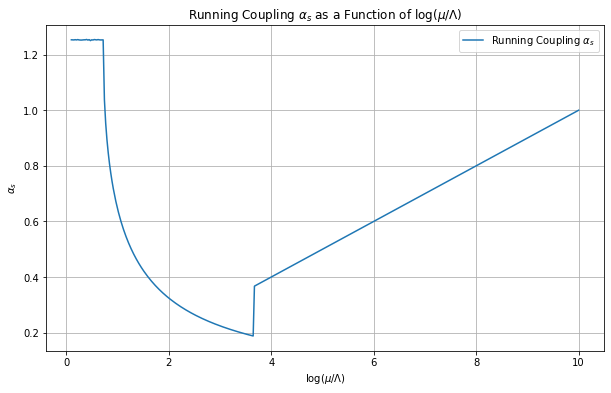

In [8]:
# Redefining the function f with the provided Beta values
def f(x, Beta0, Beta1, Beta2, Beta3):
    return (1/(2 * Beta0 * x)) + (1/(2 * Beta0)) * (Beta1/Beta0) * np.log(Beta0 * x) + \
           (x/(2 * Beta0)) * (Beta2/Beta0 - (Beta1/Beta0)**2) + \
           (x**2) / (4 * Beta0) * (Beta3/Beta0 - (Beta1/Beta0)**3 - 2 * ((Beta1 * Beta2)/(Beta0**2) - (Beta1/Beta0)**3))

# Redoing the inverse calculation
# Selecting a range of log(mu/Lambda) values
log_mu_over_Lambda = np.linspace(0.1, 10, 400)  # Adjust the range as needed

# Calculating the inverse function (alpha_s)
alpha_s_values_1 = dynamic_inverse_f(log_mu_over_Lambda, Beta0, Beta1, Beta2, Beta3)

# Plotting the running coupling as a function of log(mu/Lambda)
plt.figure(figsize=(10, 6))
plt.plot(log_mu_over_Lambda, alpha_s_values_1, label="Running Coupling $\\alpha_s$")
plt.xlabel("log($\\mu/\\Lambda$)")
plt.ylabel("$\\alpha_s$")
plt.title("Running Coupling $\\alpha_s$ as a Function of log($\\mu/\\Lambda$)")
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipykernel_6950/1360188330.py:4: RuntimeWarning: invalid value encountered in log
  (Beta1 / Beta0) * np.log(Beta0 * x) / (2 * Beta0) + \


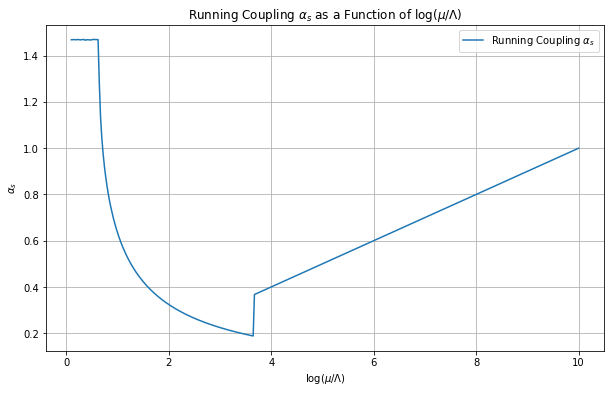

In [9]:
# Redefining the function f with the provided Beta values
def f(x, Beta0, Beta1, Beta2, Beta3):
    return 1 / (2 * Beta0 * x) + \
    (Beta1 / Beta0) * np.log(Beta0 * x) / (2 * Beta0) + \
    (Beta1 / Beta0) / (2 * Beta0) * (Beta1 * x / Beta0)**2

# Redoing the inverse calculation
# Selecting a range of log(mu/Lambda) values
log_mu_over_Lambda = np.linspace(0.1, 10, 400)  # Adjust the range as needed

# Calculating the inverse function (alpha_s)
alpha_s_values_3 = dynamic_inverse_f(log_mu_over_Lambda, Beta0, Beta1, Beta2, Beta3)

# Plotting the running coupling as a function of log(mu/Lambda)
plt.figure(figsize=(10, 6))
plt.plot(log_mu_over_Lambda, alpha_s_values_3, label="Running Coupling $\\alpha_s$")
plt.xlabel("log($\\mu/\\Lambda$)")
plt.ylabel("$\\alpha_s$")
plt.title("Running Coupling $\\alpha_s$ as a Function of log($\\mu/\\Lambda$)")
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipykernel_6950/1383270634.py:3: RuntimeWarning: invalid value encountered in log
  return 1 / (2 * Beta0 * x) + (Beta1 / Beta0) * np.log(Beta0 * x) / (2 * Beta0)


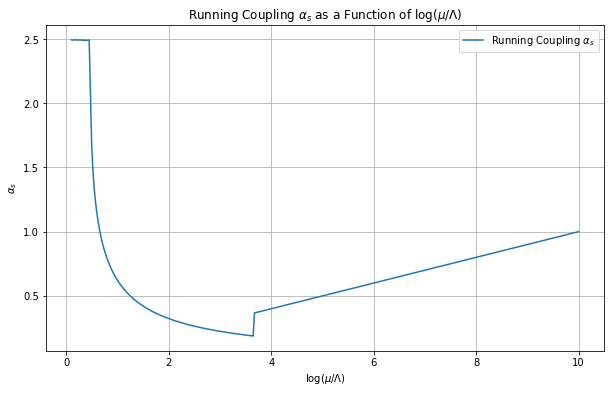

In [10]:
# Redefining the function f with the provided Beta values
def f(x, Beta0, Beta1, Beta2, Beta3):
    return 1 / (2 * Beta0 * x) + (Beta1 / Beta0) * np.log(Beta0 * x) / (2 * Beta0)
    
# Redoing the inverse calculation
# Selecting a range of log(mu/Lambda) values
log_mu_over_Lambda = np.linspace(0.1, 10, 400)  # Adjust the range as needed

# Calculating the inverse function (alpha_s)
alpha_s_values_2 = dynamic_inverse_f(log_mu_over_Lambda, Beta0, Beta1, Beta2, Beta3)

# Plotting the running coupling as a function of log(mu/Lambda)
plt.figure(figsize=(10, 6))
plt.plot(log_mu_over_Lambda, alpha_s_values_2, label="Running Coupling $\\alpha_s$")
plt.xlabel("log($\\mu/\\Lambda$)")
plt.ylabel("$\\alpha_s$")
plt.title("Running Coupling $\\alpha_s$ as a Function of log($\\mu/\\Lambda$)")
plt.legend()
plt.grid(True)
plt.show()


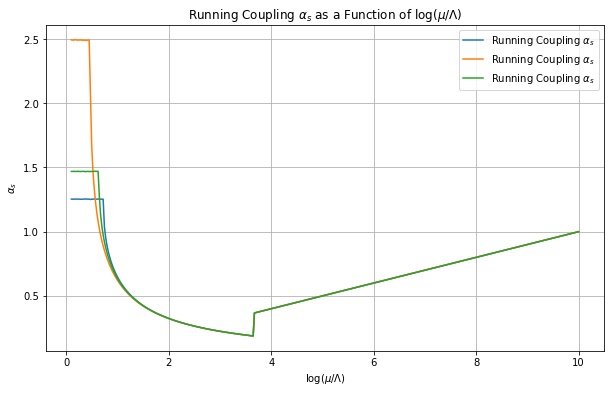

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(log_mu_over_Lambda, alpha_s_values_1, label="Running Coupling $\\alpha_s$")
plt.plot(log_mu_over_Lambda, alpha_s_values_2, label="Running Coupling $\\alpha_s$")
plt.plot(log_mu_over_Lambda, alpha_s_values_3, label="Running Coupling $\\alpha_s$")
plt.xlabel("log($\\mu/\\Lambda$)")
plt.ylabel("$\\alpha_s$")
plt.title("Running Coupling $\\alpha_s$ as a Function of log($\\mu/\\Lambda$)")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
print('',np.exp(3.5),'\n',np.exp(10))

 33.11545195869231 
 22026.465794806718


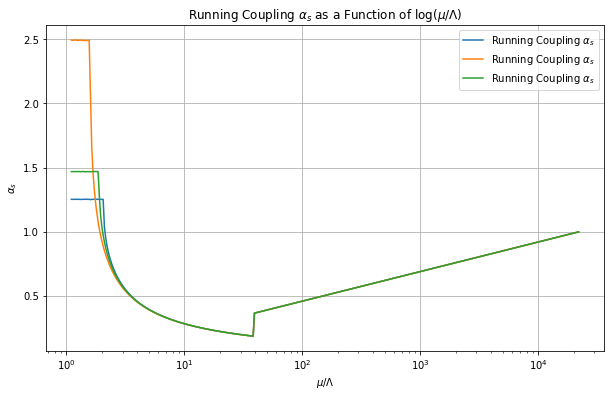

In [13]:
# Converting log(mu/Lambda) values back to mu/Lambda
mu_over_Lambda_values = np.exp(log_mu_over_Lambda)

plt.figure(figsize=(10, 6))
plt.plot(mu_over_Lambda_values, alpha_s_values_1, label="Running Coupling $\\alpha_s$")
plt.plot(mu_over_Lambda_values, alpha_s_values_2, label="Running Coupling $\\alpha_s$")
plt.plot(mu_over_Lambda_values, alpha_s_values_3, label="Running Coupling $\\alpha_s$")
plt.xscale('log')  # Setting the x-axis to a logarithmic scale for better visualization
plt.xlabel("$\\mu/\\Lambda$")
plt.ylabel("$\\alpha_s$")
plt.title("Running Coupling $\\alpha_s$ as a Function of log($\\mu/\\Lambda$)")
plt.legend()
plt.grid(True)
plt.show()

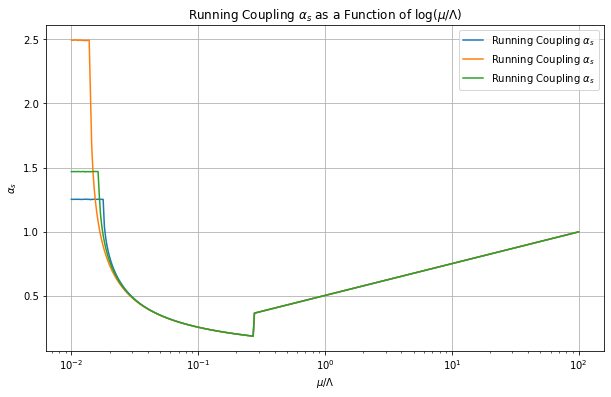

In [35]:
# Converting log(mu/Lambda) values back to mu/Lambda
log_mu_over_Lambda = np.linspace(np.log(0.01),np.log(100), 400)  # Adjust the range as needed
mu_over_Lambda_values = np.exp(log_mu_over_Lambda)


plt.figure(figsize=(10, 6))
plt.plot(mu_over_Lambda_values, alpha_s_values_1, label="Running Coupling $\\alpha_s$")
plt.plot(mu_over_Lambda_values, alpha_s_values_2, label="Running Coupling $\\alpha_s$")
plt.plot(mu_over_Lambda_values, alpha_s_values_3, label="Running Coupling $\\alpha_s$")
plt.xscale('log')  # Setting the x-axis to a logarithmic scale for better visualization
plt.xlabel("$\\mu/\\Lambda$")
plt.ylabel("$\\alpha_s$")
plt.title("Running Coupling $\\alpha_s$ as a Function of log($\\mu/\\Lambda$)")
plt.legend()
plt.grid(True)
plt.show()

In [54]:
np_linspace_start = 0.1
np_linspace_end = 5

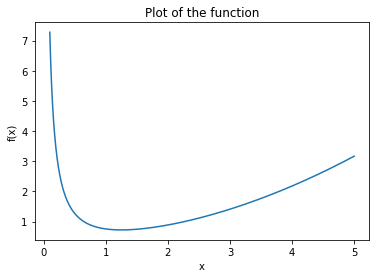

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Define symbols
x, Beta0, Beta1, Beta2, Beta3 = sp.symbols('x Beta0 Beta1 Beta2 Beta3')

# Define the function lmL_1
f = (1/(2 * Beta0 * x)) + (1/(2 * Beta0)) * (Beta1/Beta0) * sp.log(Beta0 * x) + \
    (x/(2 * Beta0)) * (Beta2/Beta0 - (Beta1/Beta0)**2) + \
    (x**2) / (4 * Beta0) * (Beta3/Beta0 - (Beta1/Beta0)**3 - 2 * ((Beta1 * Beta2)/(Beta0**2) - (Beta1/Beta0)**3))


# Lambdify the function for numerical evaluation
f_lambdified_1 = sp.lambdify(x, f.subs({Beta0: beta0(3,5), Beta1: beta1(3,5), Beta2: beta2(3,5), Beta3: beta3(3,5)}), 'numpy')

# Plot the function
x_vals = np.linspace(np_linspace_start, np_linspace_end, 4000)  # Avoid x = 0 due to division by zero
y_vals_1 = f_lambdified_1(x_vals)

plt.plot(x_vals, y_vals_1)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the function')
plt.show()


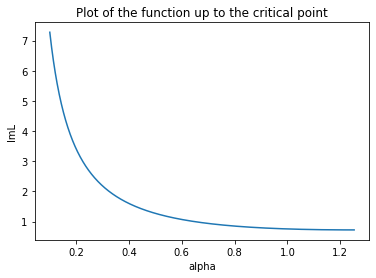

 1.253084825381738 
 0.722262715742332


In [74]:
from scipy.optimize import fsolve

# Re-import sympy as sp
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the symbols again
x, Beta0, Beta1, Beta2, Beta3 = sp.symbols('x Beta0 Beta1 Beta2 Beta3')

# Define the function lmL_1 again with the correct Beta values
f = (1/(2 * Beta0 * x)) + (1/(2 * Beta0)) * (Beta1/Beta0) * sp.log(Beta0 * x) + \
    (x/(2 * Beta0)) * (Beta2/Beta0 - (Beta1/Beta0)**2) + \
    (x**2) / (4 * Beta0) * (Beta3/Beta0 - (Beta1/Beta0)**3 - 2 * ((Beta1 * Beta2)/(Beta0**2) - (Beta1/Beta0)**3))


# Substitute the Beta values
f_substituted = f.subs({Beta0: beta0(3,5), Beta1: beta1(3,5), Beta2: beta2(3,5), Beta3: beta3(3,5)})

# Compute the derivative of f
f_derivative = sp.diff(f_substituted, x)

# Lambdify the derivative for numerical evaluation
f_derivative_lambdified = sp.lambdify(x, f_derivative, 'numpy')

# Find critical points (where the derivative is zero)
initial_guess = 0.5  # Initial guess for the root finding
critical_point, = fsolve(f_derivative_lambdified, initial_guess)

# Lambdify the original function for plotting
f_lambdified = sp.lambdify(x, f_substituted, 'numpy')

# Plot the function up to the critical point
x_vals_restricted_1 = np.linspace(np_linspace_start, critical_point, 1000)  # Avoid x = 0 due to division by zero
y_vals_restricted_1 = f_lambdified(x_vals_restricted_1)

plt.plot(x_vals_restricted_1, y_vals_restricted_1)
plt.xlabel('alpha')
plt.ylabel('lmL')
plt.title('Plot of the function up to the critical point')
plt.show()

# Output the critical point for reference
print('',critical_point,'\n',f_substituted.subs({x: critical_point}))

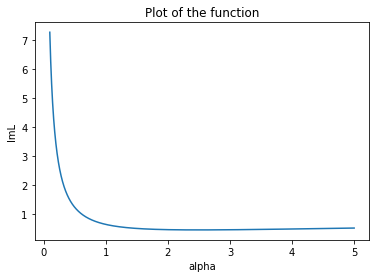

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Define symbols
x, Beta0, Beta1, Beta2, Beta3 = sp.symbols('x Beta0 Beta1 Beta2 Beta3')


# Define the function lmL_2
f = 1 / (2 * Beta0 * x) + (Beta1 / Beta0) * sp.log(Beta0 * x) / (2 * Beta0)

# Lambdify the function for numerical evaluation
f_lambdified_2 = sp.lambdify(x, f.subs({Beta0: beta0(3,5), Beta1: beta1(3,5), Beta2: beta2(3,5), Beta3: beta3(3,5)}), 'numpy')

# Plot the function
x_vals = np.linspace(np_linspace_start, np_linspace_end, 4000)  # Avoid x = 0 due to division by zero
y_vals_2 = f_lambdified_2(x_vals)

plt.plot(x_vals, y_vals_2)
plt.xlabel('alpha')
plt.ylabel('lmL')
plt.title('Plot of the function')
plt.show()


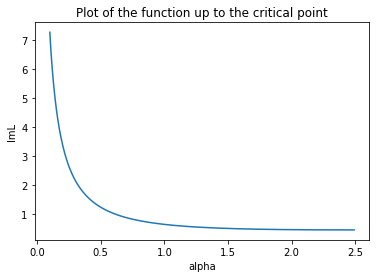

 2.491607966639995 
 0.466670615619254


In [73]:
from scipy.optimize import fsolve

# Re-import sympy as sp
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the symbols again
x, Beta0, Beta1, Beta2, Beta3 = sp.symbols('x Beta0 Beta1 Beta2 Beta3')

# Define the function lmL_2 again with the correct Beta values
f = 1 / (2 * Beta0 * x) + (Beta1 / Beta0) * sp.log(Beta0 * x) / (2 * Beta0)


# Substitute the Beta values
f_substituted = f.subs({Beta0: beta0(3,5), Beta1: beta1(3,5), Beta2: beta2(3,5), Beta3: beta3(3,5)})

# Compute the derivative of f
f_derivative = sp.diff(f_substituted, x)

# Lambdify the derivative for numerical evaluation
f_derivative_lambdified = sp.lambdify(x, f_derivative, 'numpy')

# Find critical points (where the derivative is zero)
initial_guess = 0.5  # Initial guess for the root finding
critical_point, = fsolve(f_derivative_lambdified, initial_guess)

# Lambdify the original function for plotting
f_lambdified = sp.lambdify(x, f_substituted, 'numpy')

# Plot the function up to the critical point
x_vals_restricted_2 = np.linspace(np_linspace_start, critical_point, 1000)  # Avoid x = 0 due to division by zero
y_vals_restricted_2 = f_lambdified(x_vals_restricted_2)

plt.plot(x_vals_restricted_2, y_vals_restricted_2)
plt.xlabel('alpha')
plt.ylabel('lmL')
plt.title('Plot of the function up to the critical point')
plt.show()

# Output the critical point for reference
print('',critical_point,'\n',f_substituted.subs({x: critical_point}))

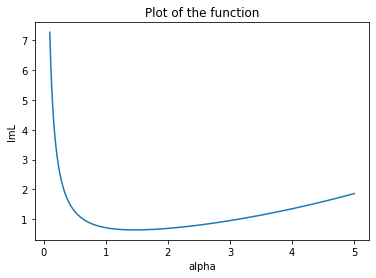

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Define symbols
x, Beta0, Beta1, Beta2, Beta3 = sp.symbols('x Beta0 Beta1 Beta2 Beta3')

# Define the function lmL_3
f = 1 / (2 * Beta0 * x) + \
    (Beta1 / Beta0) * sp.log(Beta0 * x) / (2 * Beta0) + \
    (Beta1 / Beta0) / (2 * Beta0) * (Beta1 * x / Beta0)**2

# Lambdify the function for numerical evaluation
f_lambdified_3 = sp.lambdify(x, f.subs({Beta0: beta0(3,5), Beta1: beta1(3,5), Beta2: beta2(3,5), Beta3: beta3(3,5)}), 'numpy')

# Plot the function
x_vals = np.linspace(np_linspace_start, np_linspace_end, 4000)  # Avoid x = 0 due to division by zero
y_vals_3 = f_lambdified_3(x_vals)

plt.plot(x_vals, y_vals_3)
plt.xlabel('alpha')
plt.ylabel('lmL')
plt.title('Plot of the function')
plt.show()


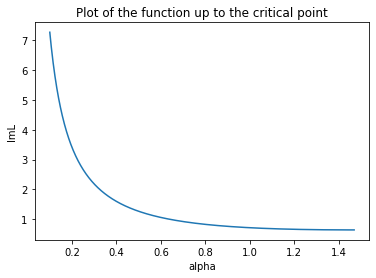

 1.469437041212187 
 0.636191429607648


In [72]:
from scipy.optimize import fsolve

# Re-import sympy as sp
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the symbols again
x, Beta0, Beta1, Beta2, Beta3 = sp.symbols('x Beta0 Beta1 Beta2 Beta3')

# Define the function lmL_3 again with the correct Beta values
f = 1 / (2 * Beta0 * x) + \
    (Beta1 / Beta0) * sp.log(Beta0 * x) / (2 * Beta0) + \
    (Beta1 / Beta0) / (2 * Beta0) * (Beta1 * x / Beta0)**2

# Substitute the Beta values
f_substituted = f.subs({Beta0: beta0(3,5), Beta1: beta1(3,5), Beta2: beta2(3,5), Beta3: beta3(3,5)})

# Compute the derivative of f
f_derivative = sp.diff(f_substituted, x)

# Lambdify the derivative for numerical evaluation
f_derivative_lambdified = sp.lambdify(x, f_derivative, 'numpy')

# Find critical points (where the derivative is zero)
initial_guess = 0.5  # Initial guess for the root finding
critical_point, = fsolve(f_derivative_lambdified, initial_guess)

# Lambdify the original function for plotting
f_lambdified = sp.lambdify(x, f_substituted, 'numpy')

# Plot the function up to the critical point
x_vals_restricted_3 = np.linspace(np_linspace_start, critical_point, 1000)  # Avoid x = 0 due to division by zero
y_vals_restricted_3 = f_lambdified(x_vals_restricted_3)

plt.plot(x_vals_restricted_3, y_vals_restricted_3)
plt.xlabel('alpha')
plt.ylabel('lmL')
plt.title('Plot of the function up to the critical point')
plt.show()

# Output the critical point for reference
print('',critical_point,'\n',f_substituted.subs({x: critical_point}))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


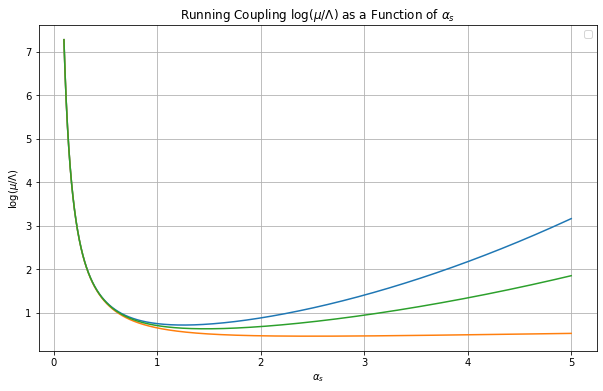

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals_1)
plt.plot(x_vals, y_vals_2)
plt.plot(x_vals, y_vals_3)
plt.ylabel("log($\\mu/\\Lambda$)")
plt.xlabel("$\\alpha_s$")
plt.title("Running Coupling log($\\mu/\\Lambda$) as a Function of $\\alpha_s$")
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


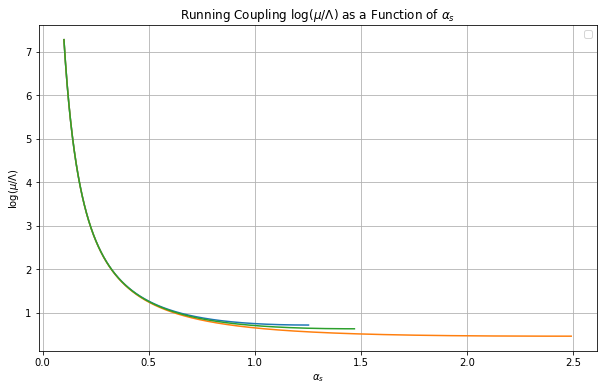

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(x_vals_restricted_1, y_vals_restricted_1)
plt.plot(x_vals_restricted_2, y_vals_restricted_2)
plt.plot(x_vals_restricted_3, y_vals_restricted_3)
plt.ylabel("log($\\mu/\\Lambda$)")
plt.xlabel("$\\alpha_s$")
plt.title("Running Coupling log($\\mu/\\Lambda$) as a Function of $\\alpha_s$")
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


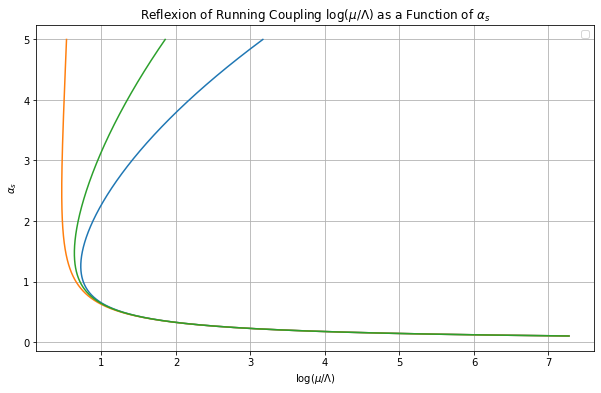

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(y_vals_1, x_vals)
plt.plot(y_vals_2, x_vals)
plt.plot(y_vals_3, x_vals)
plt.xlabel("log($\\mu/\\Lambda$)")
plt.ylabel("$\\alpha_s$")
plt.title("Reflexion of Running Coupling log($\\mu/\\Lambda$) as a Function of $\\alpha_s$")
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


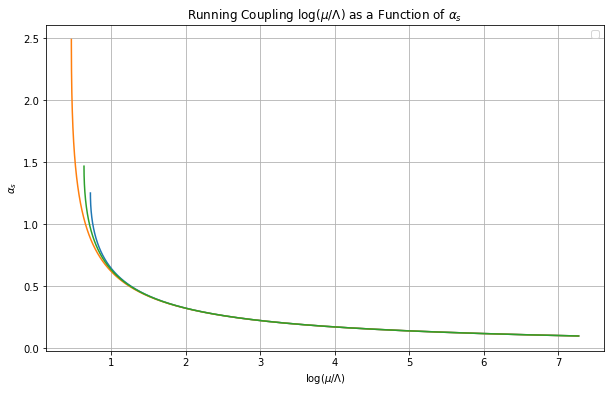

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(y_vals_restricted_1, x_vals_restricted_1)
plt.plot(y_vals_restricted_2, x_vals_restricted_2)
plt.plot(y_vals_restricted_3, x_vals_restricted_3)
plt.xlabel("log($\\mu/\\Lambda$)")
plt.ylabel("$\\alpha_s$")
plt.title("Running Coupling log($\\mu/\\Lambda$) as a Function of $\\alpha_s$")
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


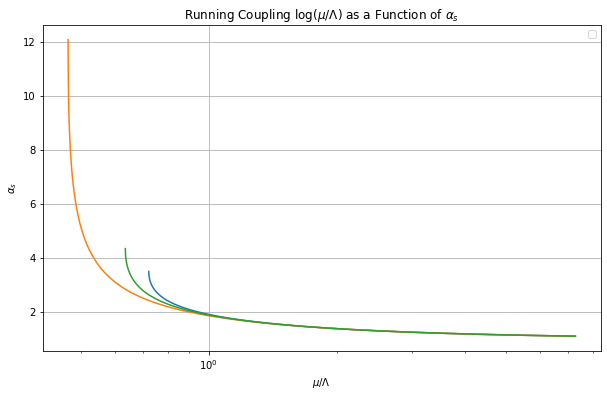

In [68]:
# Converting log(mu/Lambda) values back to mu/Lambda
x_vals_restricted_new_1 = np.exp(x_vals_restricted_1)
x_vals_restricted_new_2 = np.exp(x_vals_restricted_2)
x_vals_restricted_new_3 = np.exp(x_vals_restricted_3)

plt.figure(figsize=(10, 6))
plt.plot(y_vals_restricted_1, x_vals_restricted_new_1)
plt.plot(y_vals_restricted_2, x_vals_restricted_new_2)
plt.plot(y_vals_restricted_3, x_vals_restricted_new_3)
plt.xscale('log')
plt.xlabel("$\\mu/\\Lambda$")
plt.ylabel("$\\alpha_s$")
plt.title("Running Coupling log($\\mu/\\Lambda$) as a Function of $\\alpha_s$")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
x=sp.symbols('x')

# Define the function lmL_3
f = 1 / (2 * Beta0 * x) + \
    (Beta1 / Beta0) * sp.log(Beta0 * x) / (2 * Beta0) + \
    (Beta1 / Beta0) / (2 * Beta0) * (Beta1 * x / Beta0)**2

if sp.diff(f,x) == 0:
    print(f)
else: print('ok')

ok


/tmp/ipykernel_4641/927585411.py:8: RuntimeWarning: invalid value encountered in log
  (Beta1 / Beta0) * np.log(Beta0 * x) / (2 * Beta0) + \


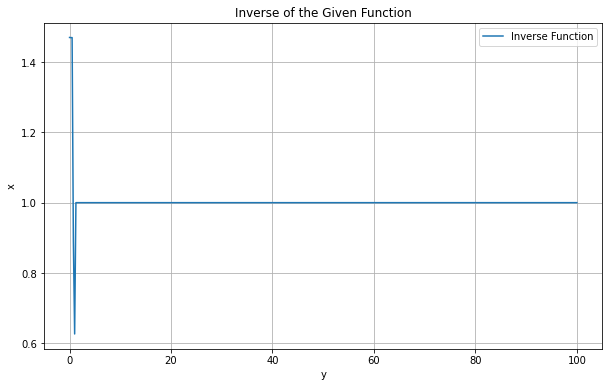

In [17]:
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

# Function definition
def f(x, Beta0, Beta1, Beta2, Beta3):
    return 1 / (2 * Beta0 * x) + \
    (Beta1 / Beta0) * np.log(Beta0 * x) / (2 * Beta0) + \
    (Beta1 / Beta0) / (2 * Beta0) * (Beta1 * x / Beta0)**2

# Beta values
Beta0 = 0.6100939485189322
Beta1 = 0.24485952713564968
Beta2 = 0.09116471061282587
Beta3 = 0.19353607511601503

# Inverse function approximation
def inverse_f(y, Beta0, Beta1, Beta2, Beta3):
    # Given y, find x such that f(x) = y
    func = lambda x: f(x, Beta0, Beta1, Beta2, Beta3) - y
    x_initial_guess = 1.0
    x_solution, = fsolve(func, x_initial_guess)
    return x_solution

# Range of y values
y_values = np.linspace(0.01, 100, 400)
x_values = [inverse_f(y, Beta0, Beta1, Beta2, Beta3) for y in y_values]

# Plotting the inverse function
plt.figure(figsize=(10, 6))
plt.plot(y_values, x_values, label="Inverse Function")
plt.xlabel("y")
plt.ylabel("x")
plt.title("Inverse of the Given Function")
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipykernel_4641/927585411.py:8: RuntimeWarning: invalid value encountered in log
  (Beta1 / Beta0) * np.log(Beta0 * x) / (2 * Beta0) + \


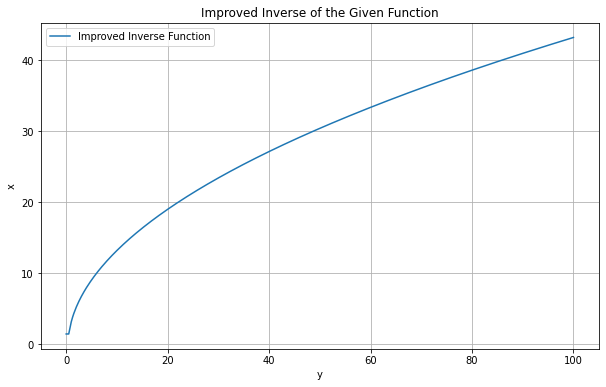

In [18]:
# Improved method for the inverse function using adaptive guessing
def improved_inverse_f(y_values, Beta0, Beta1, Beta2, Beta3):
    x_values = []
    x_initial_guess = 1.0  # Starting guess for the first y value

    for y in y_values:
        func = lambda x: f(x, Beta0, Beta1, Beta2, Beta3) - y
        x_solution, = fsolve(func, x_initial_guess)

        # Update the guess for the next iteration
        x_initial_guess = x_solution

        x_values.append(x_solution)

    return x_values

# Calculating the inverse function values with the improved method
improved_x_values = improved_inverse_f(y_values, Beta0, Beta1, Beta2, Beta3)

# Plotting the improved inverse function
plt.figure(figsize=(10, 6))
plt.plot(y_values, improved_x_values, label="Improved Inverse Function")
plt.xlabel("y")
plt.ylabel("x")
plt.title("Improved Inverse of the Given Function")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
import numpy as np
from scipy.optimize import brentq

# Define Beta coefficients
Beta0 = beta0(3,5)
Beta1 = beta1(3,5)
Beta2 = beta2(3,5)
Beta3 = beta3(3,5)

def f(x, Beta0=Beta0, Beta1=Beta1, Beta2=Beta2, Beta3=Beta3):
    return (1/(2 * Beta0 * x)) + (1/(2 * Beta0)) * (Beta1/Beta0) * np.log(Beta0 * x) + \
           (x/(2 * Beta0)) * (Beta2/Beta0 - (Beta1/Beta0)**2) + \
           (x**2) / (4 * Beta0) * (Beta3/Beta0 - (Beta1/Beta0)**3 - 2 * 
((Beta1 * Beta2)/(Beta0**2) - (Beta1/Beta0)**3))

def g(x, Beta0=Beta0, Beta1=Beta1, Beta2=Beta2, Beta3=Beta3):
    y = f(x, Beta0, Beta1, Beta2, Beta3)
    return brentq(lambda z: f(z, Beta0, Beta1, Beta2, Beta3)-x, 0.01, 100)

g(x, Beta0=Beta0, Beta1=Beta1, Beta2=Beta2, Beta3=Beta3)

ValueError: f(a) and f(b) must have different signs

In [9]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.01, 100, num=1000)
y = g(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('g(x) = f^-1(x)')
plt.show()


ValueError: f(a) and f(b) must have different signs

In [11]:
import numpy as np
import scipy.roots as rs

# Define a helper function for calculating f'(x) derivative
def df(x, Beta0=Beta0, Beta1=Beta1, Beta2=Beta2, Beta3=Beta3):
    return -((1/(2 * Beta0 * x**2)) + (np.log(Beta0 * x) * (Beta1/Beta0)) + \
             ((x / (2 * Beta0)) * ((Beta2/Beta0) - (np.power(Beta1/Beta0, 2)))) + \
             ((x**2) / (4 * Beta0) * ((Beta3/Beta0) - np.power(np.divide(Beta1, Beta0), 3) - 2 * (np.multiply(Beta1, Beta2) / np.power(np.divide(Beta0, Beta0)**2) - np.power(np.divide(Beta1, Beta0),
3)))))

# Find approximate roots using the Newton-Raphson method
roots = rs.nsolve(lambda x: f(x, Beta0, Beta1, Beta2, Beta3), 0)
print("Approximate roots of f(x): ", roots)

if len(roots) > 0:
    approx_root = roots[0]
    # Adjust x-axis range to include the root
    x = np.linspace(min([0, approx_root - 1, 0.01]), max([approx_root + 1, 100]), num=1000)
else:
    print("Warning: Function f(x) does not have any real roots within the given range.")
    
y = g(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('g(x) = f^-1(x)')
plt.show()


ModuleNotFoundError: No module named 'scipy.roots'

In [12]:
import numpy as np
from scipy.optimize import brentq, roots as scipy_roots

# Define a helper function for calculating f'(x) derivative
def df(x, Beta0=Beta0, Beta1=Beta1, Beta2=Beta2, Beta3=Beta3):
    return -((1/(2 * Beta0 * x**2)) + (np.log(Beta0 * x) * (Beta1/Beta0)) + \
             ((x / (2 * Beta0)) * ((Beta2/Beta0) - (np.power(Beta1/Beta0, 2)))) + \
             ((x**2) / (4 * Beta0) * ((Beta3/Beta0) - np.power(np.divide(Beta1, Beta0), 3) - 2 * (np.multiply(Beta1, Beta2) / np.power(np.divide(Beta0, Beta0)**2) - np.power(np.divide(Beta1, Beta0),
3)))))

# Find approximate roots using the brentq method from scipy.optimize
roots = []
try:
    root = brentq(lambda x: f(x, Beta0, Beta1, Beta2, Beta3), 0, 100)
    roots.append(root)
except ValueError as e:
    print("Warning: Function f(x) does not have a real root within the given range.")

if len(roots) > 0:
    approx_root = roots[0]
    # Adjust x-axis range to include the root
    x = np.linspace(min([0, approx_root - 1, 0.01]), max([approx_root + 1, 100]), num=1000)
else:
    print("Warning: Function f(x) does not have any real roots within the given range.")
    
y = g(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('g(x) = f^-1(x)')
plt.show()


ImportError: cannot import name 'roots' from 'scipy.optimize' (/home/gofer/.local/lib/python3.10/site-packages/scipy/optimize/__init__.py)

In [14]:
import numpy as np
from scipy.optimize import brentq, bisect

# Define a helper function for calculating f'(x) derivative
def df(x, Beta0=Beta0, Beta1=Beta1, Beta2=Beta2, Beta3=Beta3):
    return -((1/(2 * Beta0 * x**2)) + (np.log(Beta0 * x) * (Beta1/Beta0)) + \
             ((x / (2 * Beta0)) * ((Beta2/Beta0) - (np.power(Beta1/Beta0, 2)))) + \
             ((x**2) / (4 * Beta0) * ((Beta3/Beta0) - np.power(np.divide(Beta1, Beta0), 3) - 2 * (np.multiply(Beta1, Beta2) / np.power(np.divide(Beta0, Beta0)**2) - np.power(np.divide(Beta1, Beta0),
3)))))

# Find approximate roots using the brentq method from scipy.optimize
root = None
try:
    root = brentq(lambda x: f(x, Beta0, Beta1, Beta2, Beta3), 0.01, 100)
except ValueError as e:
    print("Warning: Function f(x) does not have a real root within the given range.")

if root is None:
    # Use bisect method to bracket the root if brentq failed
    x_left = 0.01
    x_right = 100
    mid = (x_left + x_right) / 2

    while np.sign(df(mid, Beta0, Beta1, Beta2, Beta3)) * (x_right - x_left) > 0:
        if mid < root:
            x_left = mid
        else:
            x_right = mid
        mid = (x_left + x_right) / 2

    root = mid

# Adjust x-axis range to include the root
x = np.linspace(min([0, approx_root - 1, 0.01]), max([approx_root + 1, 100]), num=1000)
y = g(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('g(x) = f^-1(x)')
plt.show()


TypeError: power() takes from 2 to 3 positional arguments but 1 were given

In [ ]:
import sympy as sp

x, beta0, beta1, beta2, beta3 = sp.symbols('x beta0 beta1 beta2 beta3')

# Define the piecewise function (replace these with actual simpler pieces)
lmL_1_piecewise = sp.Piecewise(
    (expr_piece_1, x < a),         # Replace expr_piece_1 with the expression for x < a
    (expr_piece_2, sp.And(a <= x, x <= b)),  # Replace expr_piece_2 for a <= x <= b
    (expr_piece_3, x > b)          # Replace expr_piece_3 for x > b
)


In [ ]:
# Example of a piecewise definition based on observed behavior
def piecewise_f(x_val):
    if x_val < 1:  # Assuming the behavior simplifies below x = 1
        return simplified_expression_for_small_x
    elif x_val > 4:  # Assuming the behavior simplifies above x = 4
        return simplified_expression_for_large_x
    else:
        return more_complex_expression_for_intermediate_x

# Replace simplified_expression_for_small_x, simplified_expression_for_large_x,
# and more_complex_expression_for_intermediate_x with actual simplified expressions
# based on your analysis of the function's behavior.


## Doing with the numerical method fsolve :

In [24]:
import numpy as np

def f(x, Beta0_val, Beta1_val):
    if x <= 0:  # Prevent division by zero or negative argument in log
        return np.inf
    return 1 / (2 * Beta0_val * x) + \
           (Beta1_val / Beta0_val) * np.log(Beta0_val * x) / (2 * Beta0_val) + \
           (Beta1_val / Beta0_val) / (2 * Beta0_val) * (Beta1_val * x / Beta0_val)**2


from scipy.optimize import fsolve

def inverse_f(y, Beta0_val, Beta1_val, guess=1):
    equation_to_solve = lambda x: f(x, Beta0_val, Beta1_val) - y
    x_value = fsolve(equation_to_solve, guess)
    return x_value[0]

# Assign numerical values to Beta0 and Beta1
Beta0_val = beta0(3,5)
Beta1_val = beta1(3,5)

# Example usage
y_value = 0.1  # Value for which you want to find the inverse
x_value = inverse_f(y_value, Beta0_val, Beta1_val)
print(f"The inverse of f(x) at y = {y_value} is approximately x = {x_value}")


The inverse of f(x) at y = 0.1 is approximately x = 1.4695433242458913


1.0


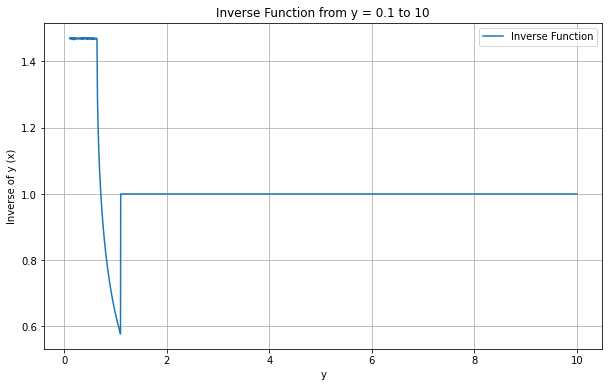

In [18]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import fsolve

def inverse_f(y, Beta0_val, Beta1_val, guess=1):
    equation_to_solve = lambda x: f(x, Beta0_val, Beta1_val) - y
    x_value = fsolve(equation_to_solve, guess)
    return x_value[0]

# Range for y values
y_values = np.linspace(0.1, 10, 5000)  # 500 points between 0.1 and 10

# Beta values
Beta0_val = beta0(3,5)
Beta1_val = beta1(3,5)

# Compute the inverse for each y value
x_values = [inverse_f(y, Beta0_val, Beta1_val) for y in y_values]
print(inverse_f(9, Beta0_val, Beta1_val))

plt.figure(figsize=(10, 6))
plt.plot(y_values, x_values, label='Inverse Function')
plt.xlabel('y')
plt.ylabel('Inverse of y (x)')
plt.title('Inverse Function from y = 0.1 to 10')
plt.legend()
plt.grid(True)
plt.show()


In [75]:
import numpy as np

def f(x, Beta0_val, Beta1_val, Beta2_val, Beta3_val):
    if x <= 0:  # Prevent division by zero or negative argument in log
        return np.inf
    return (1/(2 * Beta0_val * x)) + (1/(2 * Beta0_val)) * (Beta1_val/Beta0_val) * np.log(Beta0_val * x) + \
            (x/(2 * Beta0_val)) * (Beta2_val/Beta0_val - (Beta1_val/Beta0_val)**2) + \
            (x**2) / (4 * Beta0_val) * (Beta3_val/Beta0_val - (Beta1_val/Beta0_val)**3 - \
                                        2 * ((Beta1_val * Beta2_val)/(Beta0_val**2) - (Beta1_val/Beta0_val)**3))


from scipy.optimize import fsolve

def inverse_f(y, Beta0_val, Beta1_val, Beta2_val, Beta3_val, guess=2):
    equation_to_solve = lambda x: f(x, Beta0_val, Beta1_val, Beta2_val, Beta3_val) - y
    x_value = fsolve(equation_to_solve, guess)
    return x_value[0]

# Assign numerical values to Beta0 and Beta1
Beta0_val = beta0(3,5)
Beta1_val = beta1(3,5)
Beta2_val = beta2(3,5)
Beta3_val = beta3(3,5)

# Example usage
y_value = 0.1838736  # Value for which you want to find the inverse
x_value = inverse_f(y_value, Beta0_val, Beta1_val, Beta2_val, Beta3_val)
print(f"The inverse of f(x) at y = {y_value} is approximately x = {x_value}")


The inverse of f(x) at y = 0.1838736 is approximately x = 1.253169678958097


0.08207829640110136


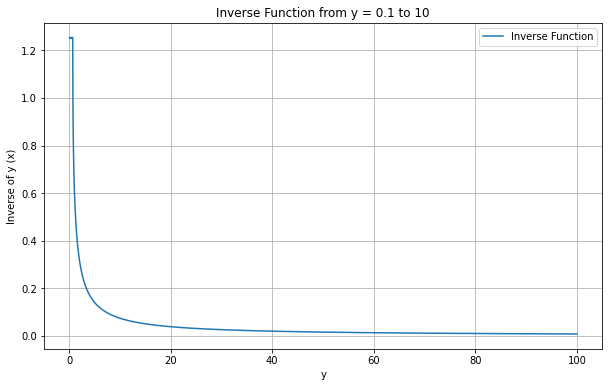

In [77]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import fsolve

def inverse_f(y, Beta0_val, Beta1_val, Beta2_val, Beta3_val, guess):
    equation_to_solve = lambda x: f(x, Beta0_val, Beta1_val, Beta2_val, Beta3_val) - y
    x_value = fsolve(equation_to_solve, guess)
    return x_value[0]

# Range for y values
y_values = np.linspace(0.1, 100, 5000)  # 500 points between 0.1 and 10

# Beta values
Beta0_val = beta0(3,5)
Beta1_val = beta1(3,5)
Beta2_val = beta2(3,5)
Beta3_val = beta3(3,5)

# Compute the inverse for each y value
x_values = [inverse_f(y, Beta0_val, Beta1_val, Beta2_val, Beta3_val,1/(1000*y)) for y in y_values]
print(inverse_f(9, Beta0_val, Beta1_val, Beta2_val, Beta3_val,0.05))

plt.figure(figsize=(10, 6))
plt.plot(y_values, x_values, label='Inverse Function')
plt.xlabel('y')
plt.ylabel('Inverse of y (x)')
plt.title('Inverse Function from y = 0.1 to 10')
plt.legend()
plt.grid(True)
plt.show()


### Let's define alpha with the results obtain in mathematica :

In [150]:
def b(Nc,nf):
    return beta1(Nc,nf) / (2 * beta0(Nc,nf)**2)

b = b(3,5)
Beta1 = beta1(3,5)
Beta0 = beta0(3,5)
print(b , Beta0 , Beta1)
#b = sp.symbols('b')

def alpha(key , mu):
    alpha = {
        1: 0,
        
        2: - Beta0 / (Beta1 * lambertw(- mu**(-1/b) / 2*b , -1)),
        
        3: 0
        }
    
    return alpha.get(key , "Invalid key")

#alpha(2,mu)

0.3289224952741021 0.6100939485189322 0.24485952713564968


## Matrix Operations:

In [26]:
from sympy import Matrix

# Example of defining a matrix
SchemeMx = Matrix([[1, 0, 0, 0], 
                   [0, 1, 0, 0], 
                   [Beta2/Beta0, 0, 1, 0],  # eta2, eta0 are symbols like Beta0
                   [Beta3/(2 * Beta0) - Beta3/2, 2 * Beta2/Beta0 - 2 * Beta2/Beta0, 0, 1]])
print(SchemeMx)
# Example of matrix multiplication
a = symbols('a0:4')  # a sequence of symbols a0, a1, a2, a3
result = SchemeMx * Matrix(a)
print(result)


Matrix([[1, 0, 0, 0], [0, 1, 0, 0], [Beta2/Beta0, 0, 1, 0], [-Beta3/2 + Beta3/(2*Beta0), 0, 0, 1]])
Matrix([[a0], [a1], [a2 + Beta2*a0/Beta0], [a0*(-Beta3/2 + Beta3/(2*Beta0)) + a3]])


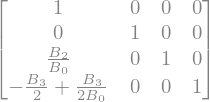

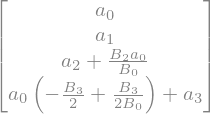

In [30]:
from sympy.interactive import init_printing
init_printing(use_unicode=True)


display(SchemeMx)
display(result)

# Running Coefficients and Static Energy:

### Define the symbolic variables:

In [19]:
from sympy import symbols, log, series

beta0, beta1, beta2, beta3, s = symbols('beta0 beta1 beta2 beta3 s')
a0, a1, a2, a3 = symbols('a0 a1 a2 a3')


### Define a function for Static Energy in Position Space:

In [20]:
def v(s, order):
    if order == 0:
        return a0
    elif order == 1:
        return a1 + 2 * a0 * beta0 * log(s)
    elif order == 2:
        return a2 + 2 * (2 * a1 * beta0 + a0 * beta1) * log(s) + a0 * (2 * beta0 * log(s))**2
    # Add more cases for higher orders
    else:
        return None


# Handling Inverse Functions:

### Define the function and find its inverse:

In [21]:
from sympy import solve

# Define symbols
a, b, c, d, x, k = symbols('a b c d x k')

# Define the function
function = (a * x + b) / (c * x + d)

# Solve the equation function = k for x to find the inverse function
inverse_function = solve(function - k, x)

# Display the inverse function
print(inverse_function)


[(-b + d*k)/(a - c*k)]


# 4. Defining the lmL Function

# 5. Finding the Inverse of a Function

In [15]:
from sympy import solve

# Define symbols
a, b, c, d, x, k = symbols('a b c d x k')

# Define the function
function = (a * x + b) / (c * x + d)

# Solve the equation function = k for x to find the inverse function
inverse_function = solve(function - k , x)

# Print the inverse function
print(inverse_function)


[(-b + d*k)/(a - c*k)]


### ProductLog:

In [70]:
from scipy.special import lambertw
import numpy as np

# Compute the Lambert W function of 1 (equivalent to ProductLog[1] in Mathematica)
w = lambertw(1)

# w is a complex number, to get the real part
real_part = np.real(w)

print(real_part)


0.5671432904097838


In [9]:
w1 = lambertw(-0.01,-1)
w2 = lambertw(-0.01,0)
w3 = lambertw(-0.01)
w4 = lambertw(-0.01,2)

print('',w1,'\n',w2,'\n',w3,'\n',np.real(w3),'\n',w4)

 (-6.472775124394005+0j) 
 (-0.010101527198538754+0j) 
 (-0.010101527198538754+0j) 
 -0.010101527198538754 
 (-7.345693503274494+13.643264184258516j)


In [3]:
import numpy as np
np.euler_gamma #in wikipedia is: 0.57721566490153286060651209008240243104215933593992

0.5772156649015329